
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

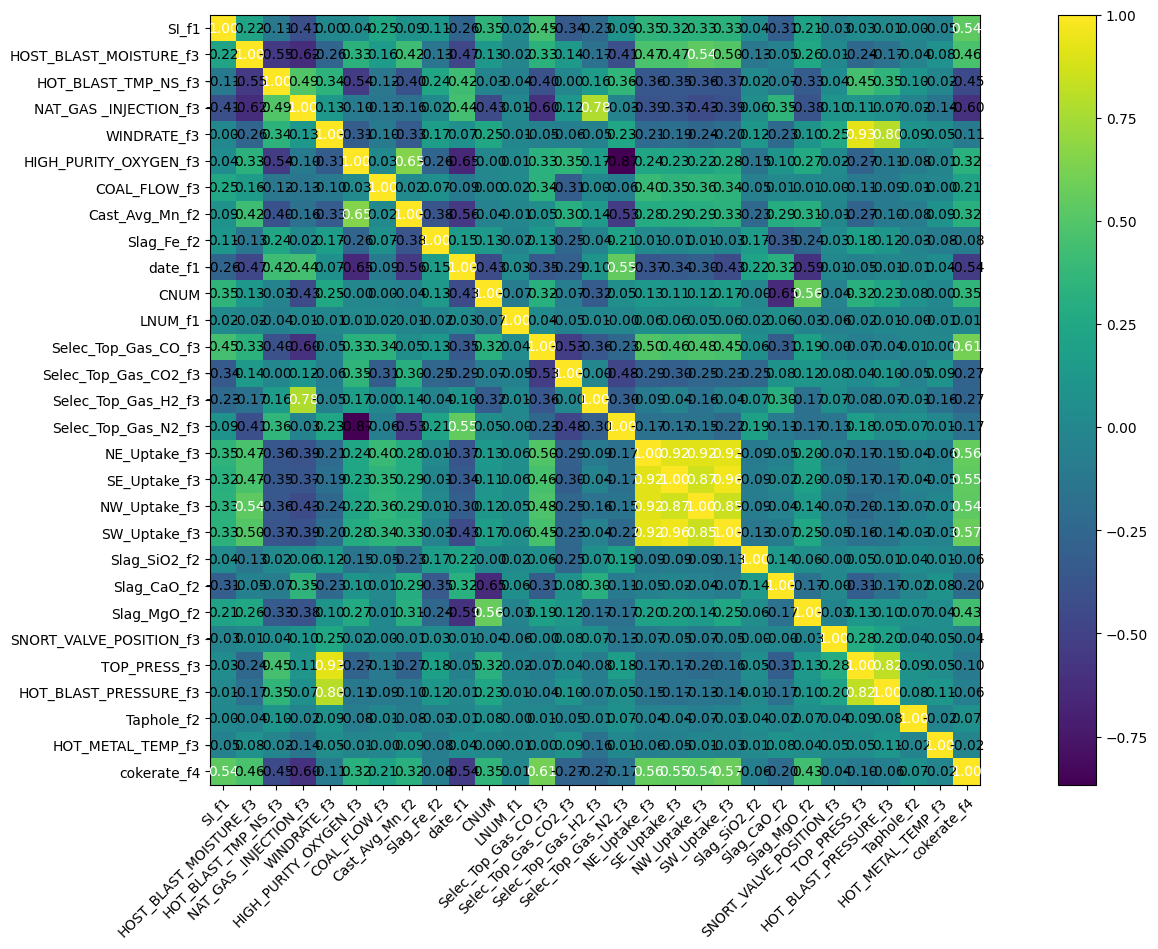

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''


'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

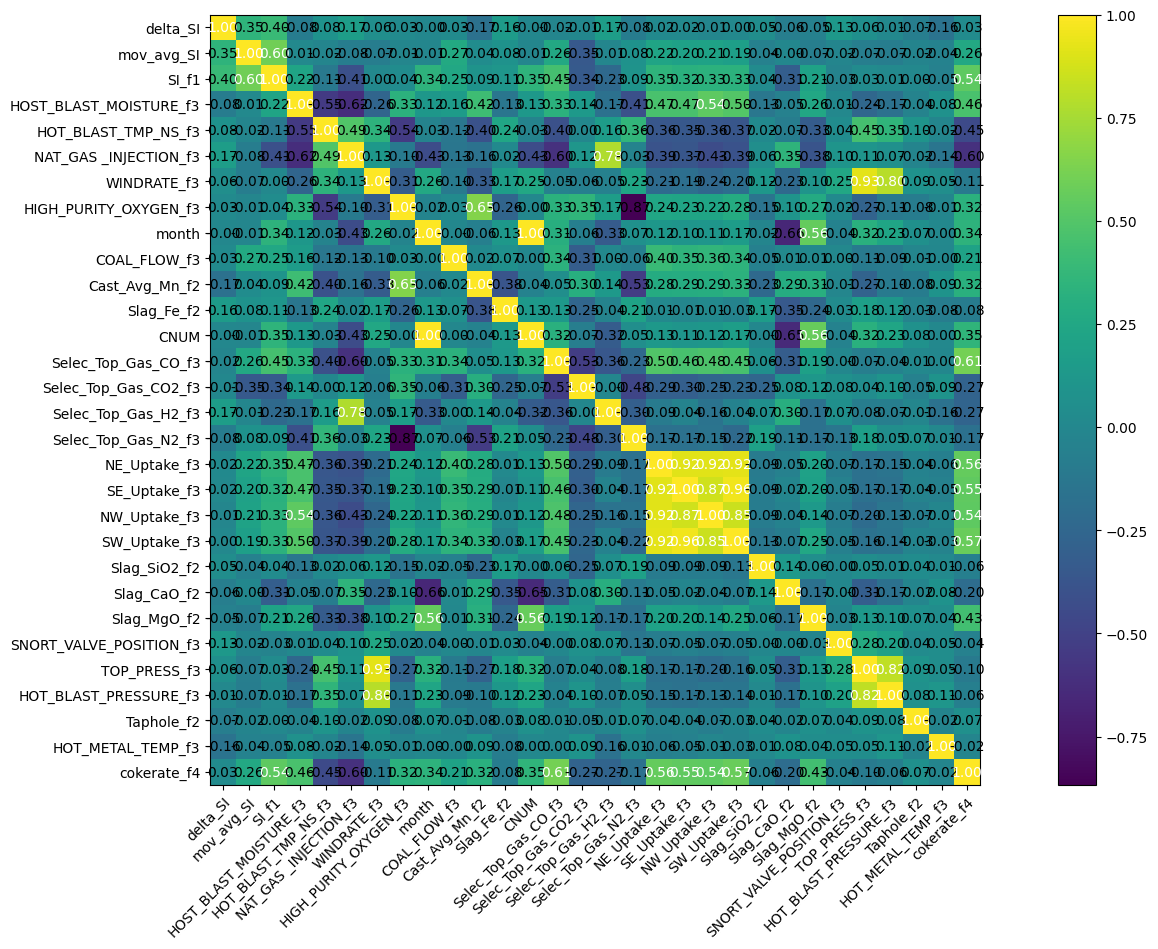

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [20]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [21]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [22]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    # === Model Setup ===
    model = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()


    # === History ===
    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    # === Data Scaling ===
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled = (train_CIVS_tr - x_means) / x_standard_devs

    model.train()
    

    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        xb, yb = tsGPT_obj.get_batch(train_CIVS_tr_scaled)  # shapes: [B, T, F]
        
        ## B, T, E  = logits.shape
        
        if model.training:
            noise = 0.01 * torch.randn_like(xb)
            xb    = xb + noise.clamp(-0.05, 0.05)

        
        # === Forward Pass with Reasoning Mode ===
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  # pred: [B, F] (only the last timestep)
        
        pred = idx_pred[:, -1:, :]
        
        #####################################################################################
        
 
        # === Match dimensions for loss ===
        B, T, E = xb.shape
        y_train = yb[:, -1, :]  # last timestep only
        
        ###################################################################################
        
        pred = pred.view(B, E)
        
        y_si = y_train[:, 2]     # [B]
        
        ###################################################################################
        
        loss_just_last   = criterion( pred, y_train)   ## just 9th of 9
        
        ## print(idx_pred.shape)
        ## print(yb.shape)
        ## print(xb.shape)
        ## print(idx_pred[:,-10:, :].shape)
        loss_full_seq    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 9 of 9
        
        all_sequence = True
        
        if all_sequence:
            loss_all = loss_full_seq
        else:
            loss_all = loss_just_last
        
        ###################################################################################
        
        
        ## loss_SI  = criterion(pred_si, y_si)    
        loss_mse  = F.mse_loss(    pred_si, y_si)
        loss_cosh = log_cosh_loss( pred_si, y_si)
        loss_SI_main = 0.5 * loss_mse + 0.5 * loss_cosh
        
        
        ## loss_SI_main = criterion(pred_si, y_si)
        y_si_early   = yb[:, :1, 2]                  # first 4 steps of SI ground truth
        si_mean_early = y_si_early.mean(dim=1)       # average over early steps
        early_penalty = F.mse_loss(pred_si, si_mean_early)
        beta    = 0  # how much to weigh the early trend alignment (can try 0.2–0.4)
        ## beta       = 0.3 * (1 - batch_i / tsGPT_obj.max_iters)

        loss_SI = (1 - beta) * loss_SI_main + beta * early_penalty
        
        
        ##################################
        
        alpha = 0.9
        
        loss_total = alpha * loss_SI + (1 - alpha) * loss_all
        
        
        
        ####################################################################################
        ## loss_total = loss_SI 
        ## loss_total = custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25)
        ##loss_total = custom_loss_ratio(pred, y_train, mse_weight=0.5, clip_eps=0.2)
        ### ratio 
        ## loss_vector = custom_loss_ratio(pred, y_train, mse_weight=0.5, log_ratio_weight=0.5)
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_vector
        ####################################################################################

        # === Backprop ===
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 500 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [23]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [24]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.882772
Loss_SI: 0.8495708703994751 Loss_all: 1.1815780401229858
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.109851
Loss_SI: 0.05314040184020996 Loss_all: 0.6202468276023865
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.065741
Loss_SI: 0.02780584990978241 Loss_all: 0.4071567952632904
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.045332
Loss_SI: 0.010918870568275452 Loss_all: 0.3550533056259155
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.045288
Loss_SI: 0.00837707705795765 Loss_all: 0.37749049067497253
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.040119
Loss_SI: 0.007912899367511272 Loss_all: 0.32997721433639526
Prediction shape: torch.Size([32, 35])
===


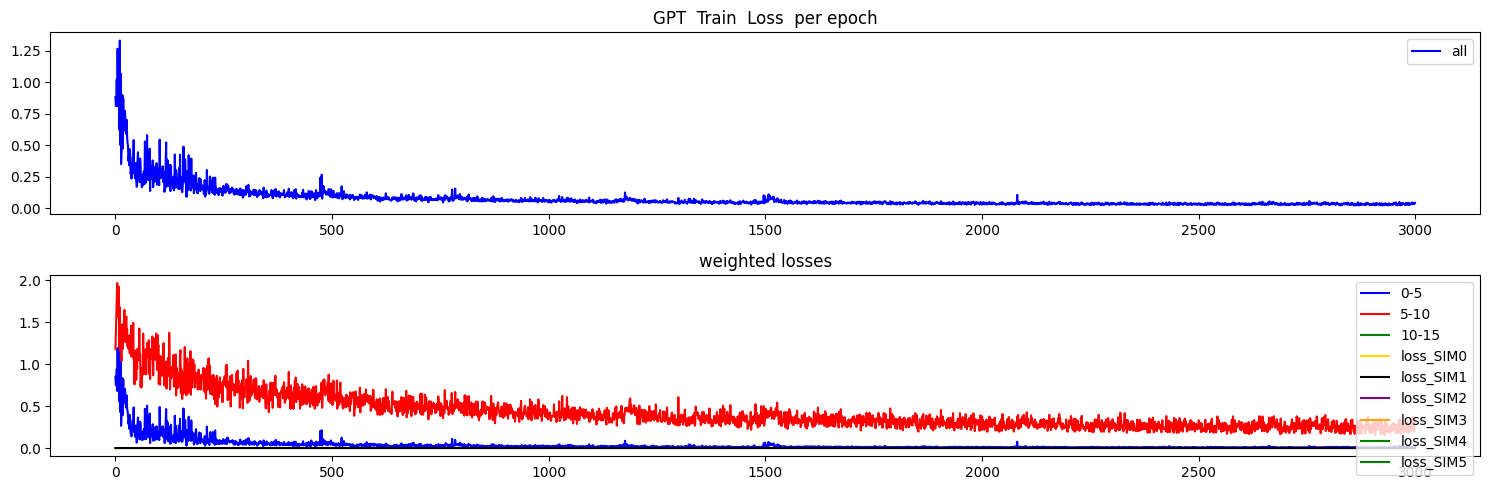

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


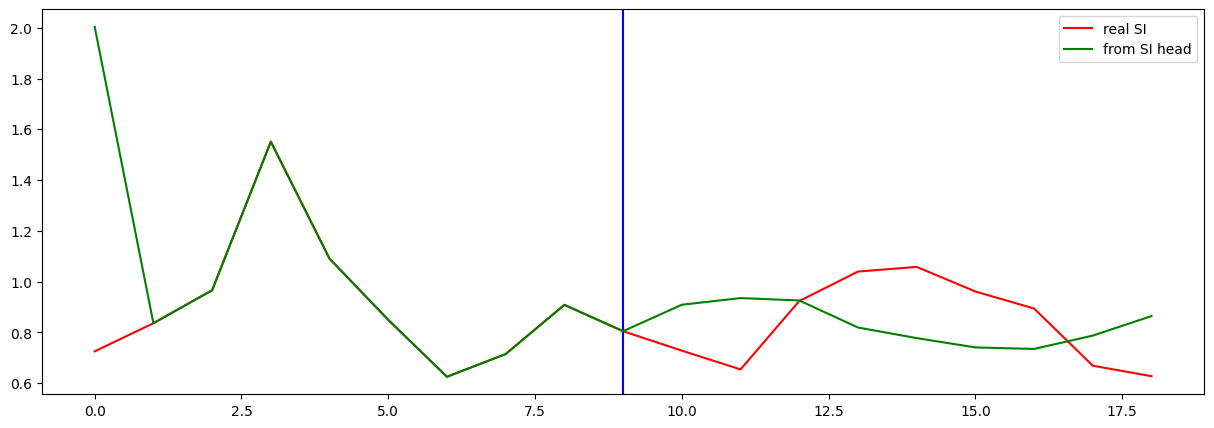

Testing R**2 - (all) - (no inputs):  0.996613794320979
Testing R**2 - (f2) - SI full (no inputs):  -0.666195145116649
Testing R**2 - SI head only (no inputs):  -0.03180839455408635
0 ...index R**2 (no inputs):  0.15566186329778597
1 ...index R**2 (no inputs):  -2.605731741701569
2 ...index R**2 (no inputs):  -0.666195145116649
3 ...index R**2 (no inputs):  -18.253160342339804
4 ...index R**2 (no inputs):  -24.111796489624773
5 ...index R**2 (no inputs):  -10.839674129823113
6 ...index R**2 (no inputs):  -44.3439606216846
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2973571620398525
10 ...index R**2 (no inputs):  -0.27420234965318024
11 ...index R**2 (no inputs):  -169.16463601689313
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.3868334904718761
16 ...index R**2 (no inputs):  0.20154521531956437
17 ...index R**2 (no inputs):  -29.39357121317

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.717063
Loss_SI: 0.6718748807907104 Loss_all: 1.123751163482666
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.135451
Loss_SI: 0.0675964504480362 Loss_all: 0.7461439371109009
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.160701
Loss_SI: 0.11026856303215027 Loss_all: 0.6145901679992676
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.107143
Loss_SI: 0.06071389466524124 Loss_all: 0.5250059366226196
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.068985
Loss_SI: 0.029533084481954575 Loss_all: 0.4240506887435913
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.056331
Loss_SI: 0.016478154808282852 Loss_all: 0.41500791907310486
Prediction shape: torch.Size([32, 35])
===


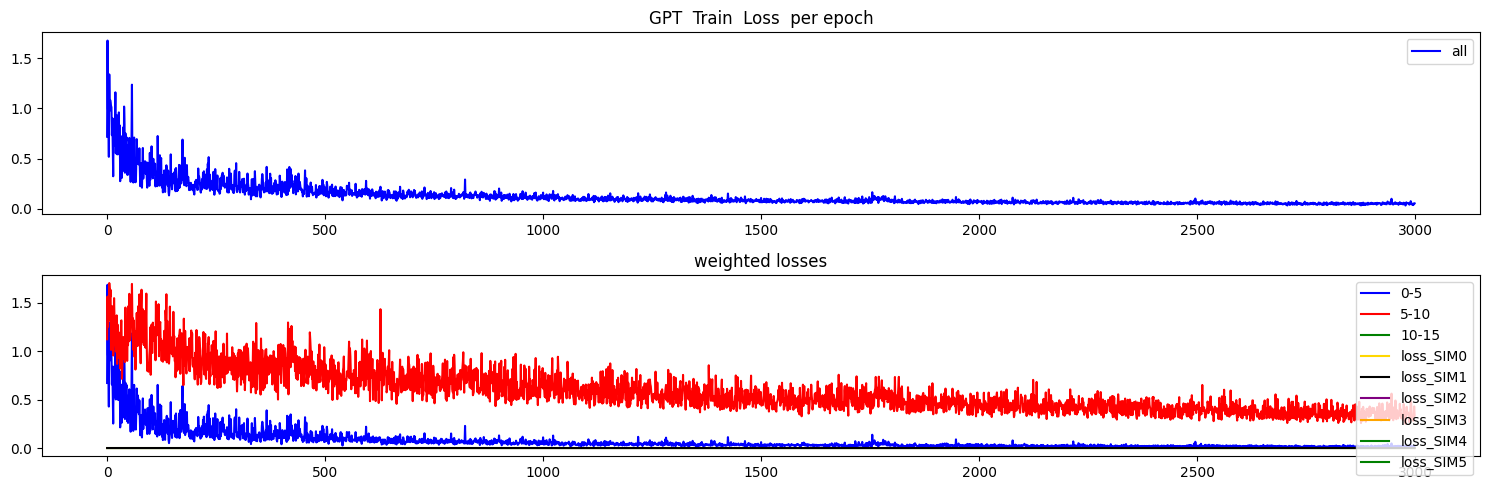

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


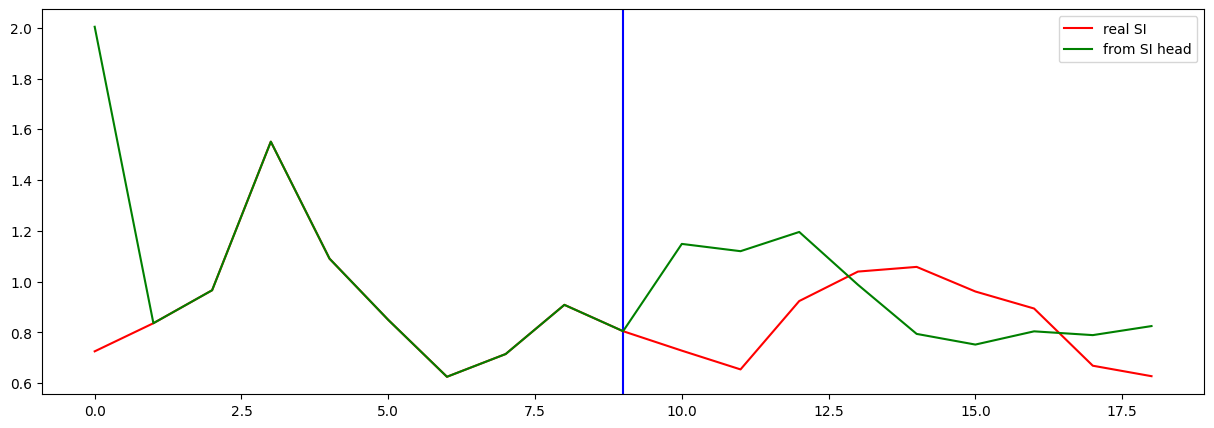

Testing R**2 - (all) - (no inputs):  0.9954805344097406
Testing R**2 - (f2) - SI full (no inputs):  0.6193786549701976
Testing R**2 - SI head only (no inputs):  -0.7720385230055666
0 ...index R**2 (no inputs):  0.018186877362399656
1 ...index R**2 (no inputs):  -3.034828524358442
2 ...index R**2 (no inputs):  0.6193786549701976
3 ...index R**2 (no inputs):  -102.37374753882591
4 ...index R**2 (no inputs):  -36.48215659067259
5 ...index R**2 (no inputs):  -14.761281207258067
6 ...index R**2 (no inputs):  -314.0327583177227
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.37680507988177725
10 ...index R**2 (no inputs):  -1.0288661001586363
11 ...index R**2 (no inputs):  -13.581063199512185
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.2416915302237497
16 ...index R**2 (no inputs):  -0.6411218870947659
17 ...index R**2 (no inputs):  -193.40200847

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.480083
Loss_SI: 0.3954719603061676 Loss_all: 1.2415870428085327
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.208078
Loss_SI: 0.15553370118141174 Loss_all: 0.6809796094894409
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.130449
Loss_SI: 0.07812566310167313 Loss_all: 0.6013634204864502
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.100933
Loss_SI: 0.05481385812163353 Loss_all: 0.5160084962844849
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.093229
Loss_SI: 0.05148467421531677 Loss_all: 0.46893054246902466
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.084132
Loss_SI: 0.038233235478401184 Loss_all: 0.4972219467163086
Prediction shape: torch.Size([32, 35])
===


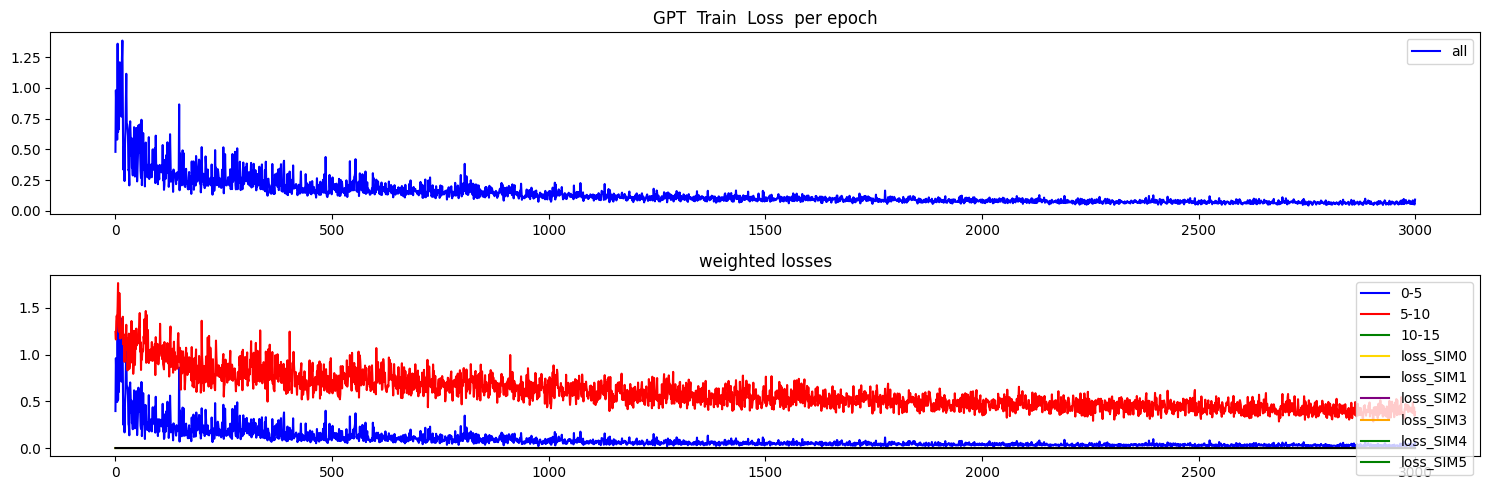

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


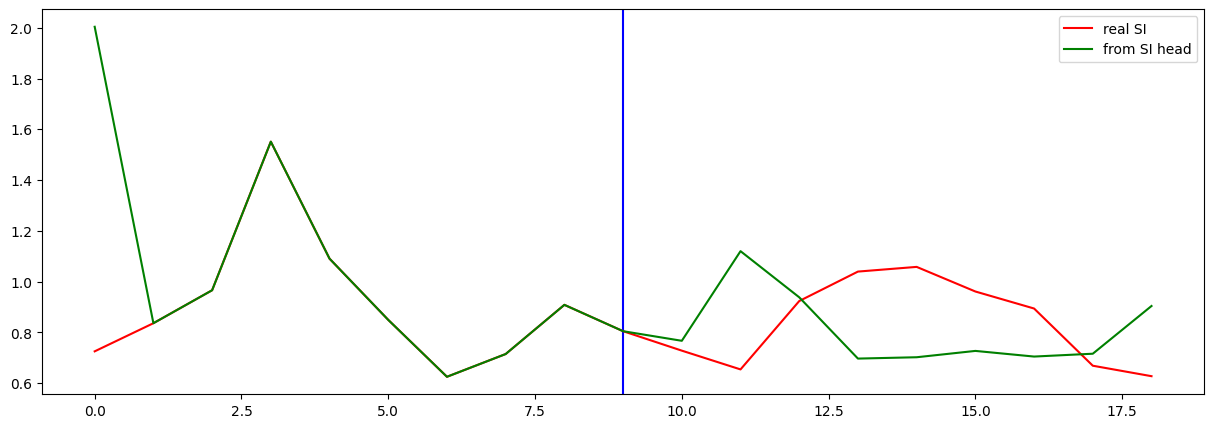

Testing R**2 - (all) - (no inputs):  0.9893999838918422
Testing R**2 - (f2) - SI full (no inputs):  -2.5645420313953244
Testing R**2 - SI head only (no inputs):  -0.40145722127563355
0 ...index R**2 (no inputs):  0.5224997400460655
1 ...index R**2 (no inputs):  -1.761585739119404
2 ...index R**2 (no inputs):  -2.5645420313953244
3 ...index R**2 (no inputs):  -183.87096868012077
4 ...index R**2 (no inputs):  -2065.2065477696474
5 ...index R**2 (no inputs):  -36.120164182454744
6 ...index R**2 (no inputs):  -32.028464886841824
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3585295160996558
10 ...index R**2 (no inputs):  0.3116393258884397
11 ...index R**2 (no inputs):  -29.98857446243723
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.110384672191393
16 ...index R**2 (no inputs):  -0.561106278956971
17 ...index R**2 (no inputs):  -388.3055814776

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.814317
Loss_SI: 0.7760064601898193 Loss_all: 1.159112572669983
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.232217
Loss_SI: 0.16919958591461182 Loss_all: 0.7993735671043396
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.166451
Loss_SI: 0.11694531887769699 Loss_all: 0.612003743648529
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.169423
Loss_SI: 0.12648829817771912 Loss_all: 0.5558345913887024
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.125572
Loss_SI: 0.0664273202419281 Loss_all: 0.6578754186630249
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.100430
Loss_SI: 0.0500340573489666 Loss_all: 0.5539957284927368
Prediction shape: torch.Size([32, 35])
===


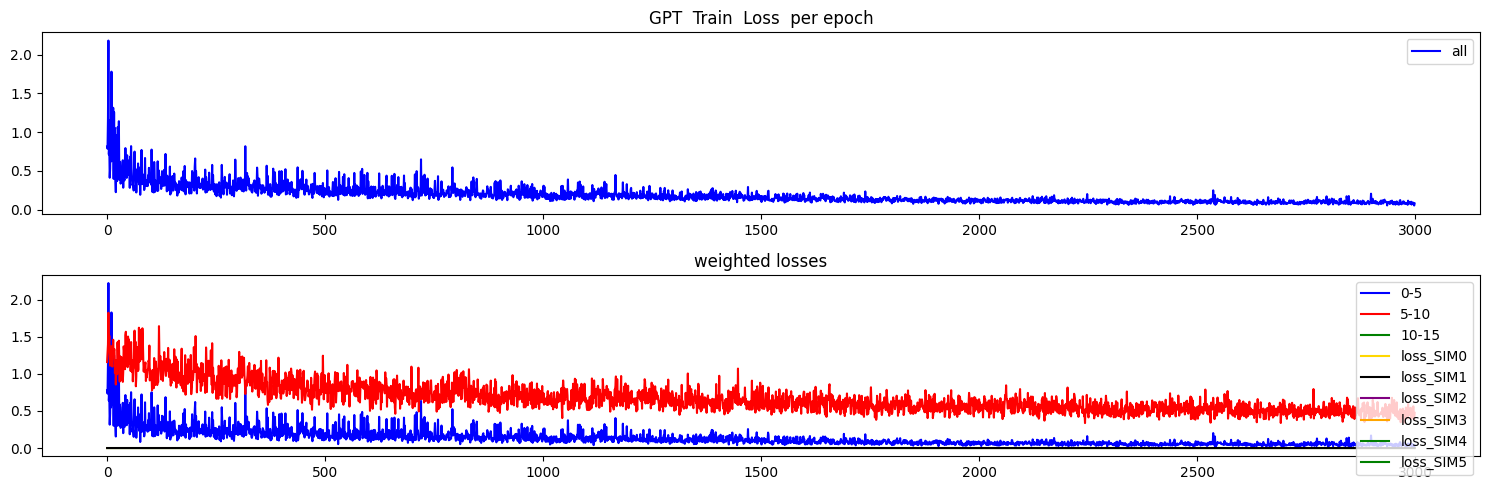

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


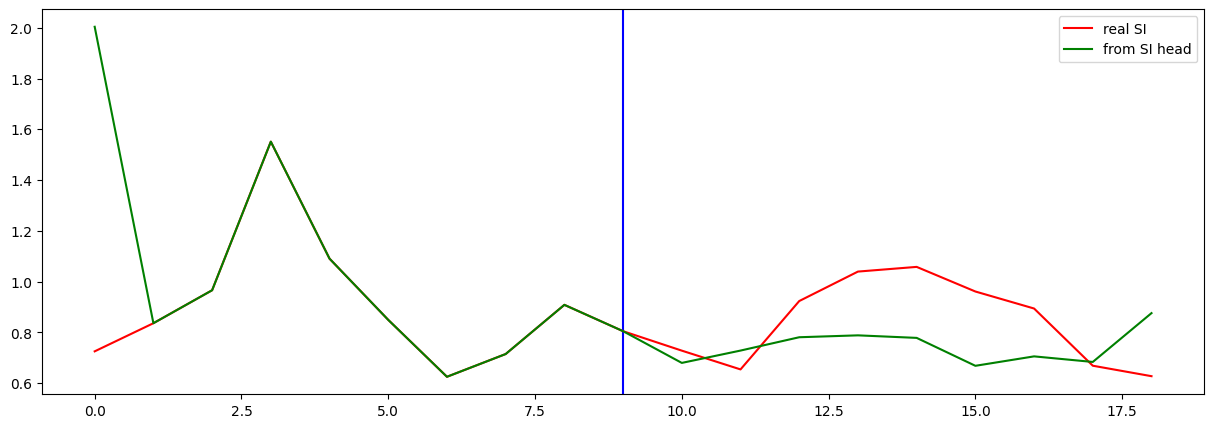

Testing R**2 - (all) - (no inputs):  0.9951267568860944
Testing R**2 - (f2) - SI full (no inputs):  -1.4042143642554472
Testing R**2 - SI head only (no inputs):  -0.23818468750764676
0 ...index R**2 (no inputs):  -0.1585231975359278
1 ...index R**2 (no inputs):  -9.633539236876935
2 ...index R**2 (no inputs):  -1.4042143642554472
3 ...index R**2 (no inputs):  -177.74992244000154
4 ...index R**2 (no inputs):  -2160.9024038489465
5 ...index R**2 (no inputs):  -15.80746089184657
6 ...index R**2 (no inputs):  -1215.4626949369883
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.09079246132530772
10 ...index R**2 (no inputs):  0.016608605493144246
11 ...index R**2 (no inputs):  -427.3085535974373
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -9.004789013982545
16 ...index R**2 (no inputs):  -0.36589049394315376
17 ...index R**2 (no inputs):  -442.83628

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [29]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.482670
Loss_SI: 0.3954097628593445 Loss_all: 1.2680100202560425
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.126250
Loss_SI: 0.060553330928087234 Loss_all: 0.7175222039222717
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.074996
Loss_SI: 0.023426536470651627 Loss_all: 0.5391172766685486
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.057378
Loss_SI: 0.02031354233622551 Loss_all: 0.3909565806388855
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.048087
Loss_SI: 0.01564769260585308 Loss_all: 0.3400432765483856
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.043757
Loss_SI: 0.014105793088674545 Loss_all: 0.31061410903930664
Prediction shape: torch.Size([32, 35])
===


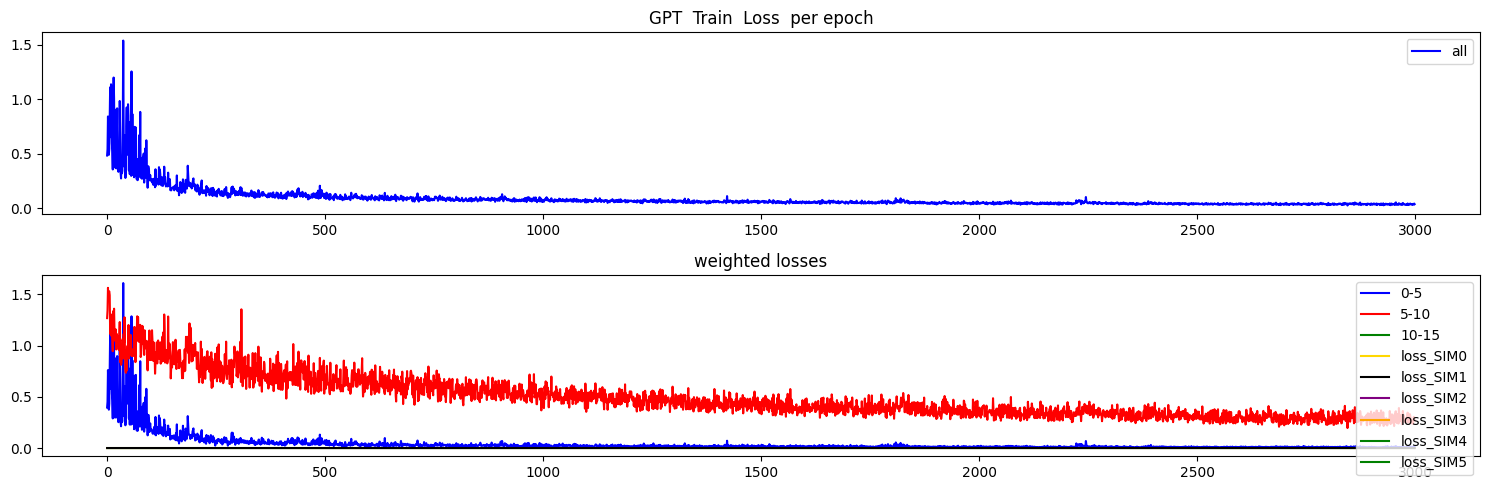

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


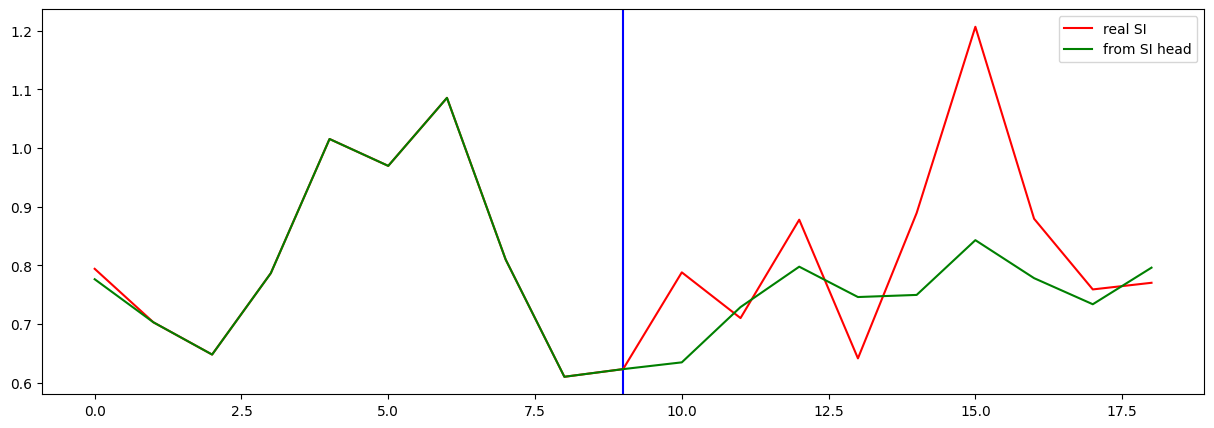

Testing R**2 - (all) - (no inputs):  0.9878827649669129
Testing R**2 - (f2) - SI full (no inputs):  0.042472150468786274
Testing R**2 - SI head only (no inputs):  -0.3588292387323384
0 ...index R**2 (no inputs):  -0.08184645003219804
1 ...index R**2 (no inputs):  -1.5053406738344237
2 ...index R**2 (no inputs):  0.042472150468786274
3 ...index R**2 (no inputs):  0.22896956875426544
4 ...index R**2 (no inputs):  -283.77555566059425
5 ...index R**2 (no inputs):  -2.164042202473258
6 ...index R**2 (no inputs):  -3585.6860525210955
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2041344961966931
10 ...index R**2 (no inputs):  -0.48957690001493126
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.3330448293194903
16 ...index R**2 (no inputs):  -6.8178459725346015
17 ...index R**2 (no inputs):  -26.312336229837218
18 

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.266804
Loss_SI: 0.18959973752498627 Loss_all: 0.9616446495056152
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.154321
Loss_SI: 0.09389333426952362 Loss_all: 0.6981673240661621
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.107950
Loss_SI: 0.04747330769896507 Loss_all: 0.6522393822669983
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.070369
Loss_SI: 0.03339105844497681 Loss_all: 0.4031711518764496
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.057634
Loss_SI: 0.02568921446800232 Loss_all: 0.3451384902000427
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.054624
Loss_SI: 0.013068766333162785 Loss_all: 0.4286176264286041
Prediction shape: torch.Size([32, 35])
===


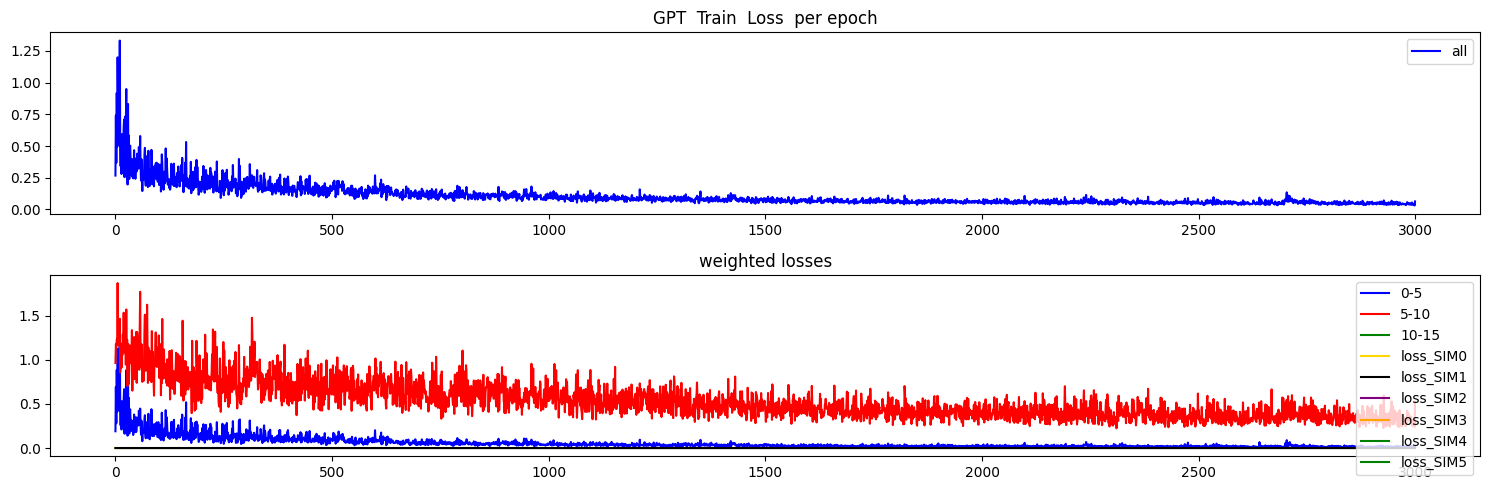

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


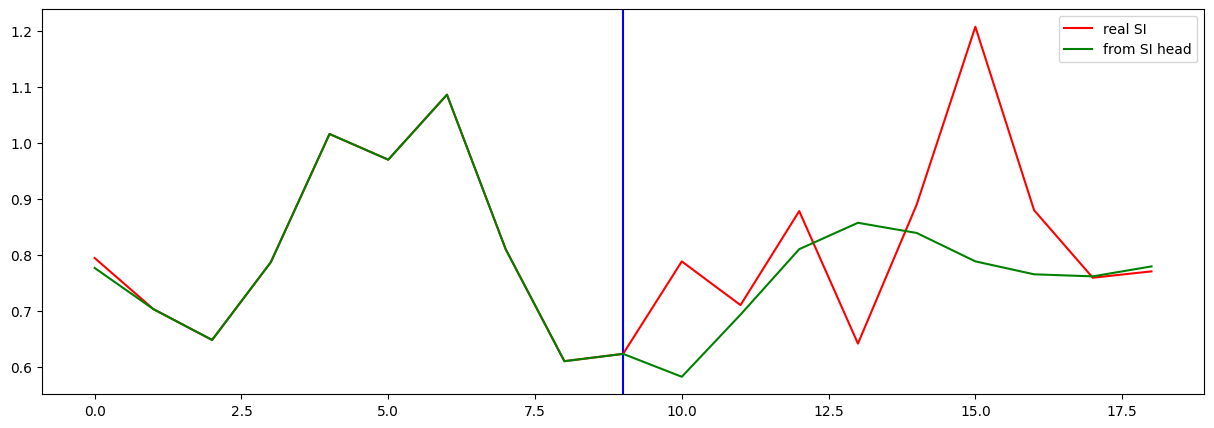

Testing R**2 - (all) - (no inputs):  0.9860909972737097
Testing R**2 - (f2) - SI full (no inputs):  -1.4804270502444843
Testing R**2 - SI head only (no inputs):  -0.06825811440798946
0 ...index R**2 (no inputs):  0.14548580694078594
1 ...index R**2 (no inputs):  0.044379257072199585
2 ...index R**2 (no inputs):  -1.4804270502444843
3 ...index R**2 (no inputs):  0.7059726318292989
4 ...index R**2 (no inputs):  -571.6455182739853
5 ...index R**2 (no inputs):  -2.622212537250311
6 ...index R**2 (no inputs):  -4012.4461588168856
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.1401900330116908
10 ...index R**2 (no inputs):  -1.255125133327418
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -7.601732525709215
16 ...index R**2 (no inputs):  -2.569139708240681
17 ...index R**2 (no inputs):  -500.8199830784795
18 ...index

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.528775
Loss_SI: 0.46907997131347656 Loss_all: 1.0660300254821777
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.164918
Loss_SI: 0.12048317492008209 Loss_all: 0.5648313760757446
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.108605
Loss_SI: 0.05310213193297386 Loss_all: 0.608130931854248
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.076251
Loss_SI: 0.025234393775463104 Loss_all: 0.5354024767875671
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.077071
Loss_SI: 0.03914395719766617 Loss_all: 0.41841042041778564
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.071370
Loss_SI: 0.033914901316165924 Loss_all: 0.4084700047969818
Prediction shape: torch.Size([32, 35])
===


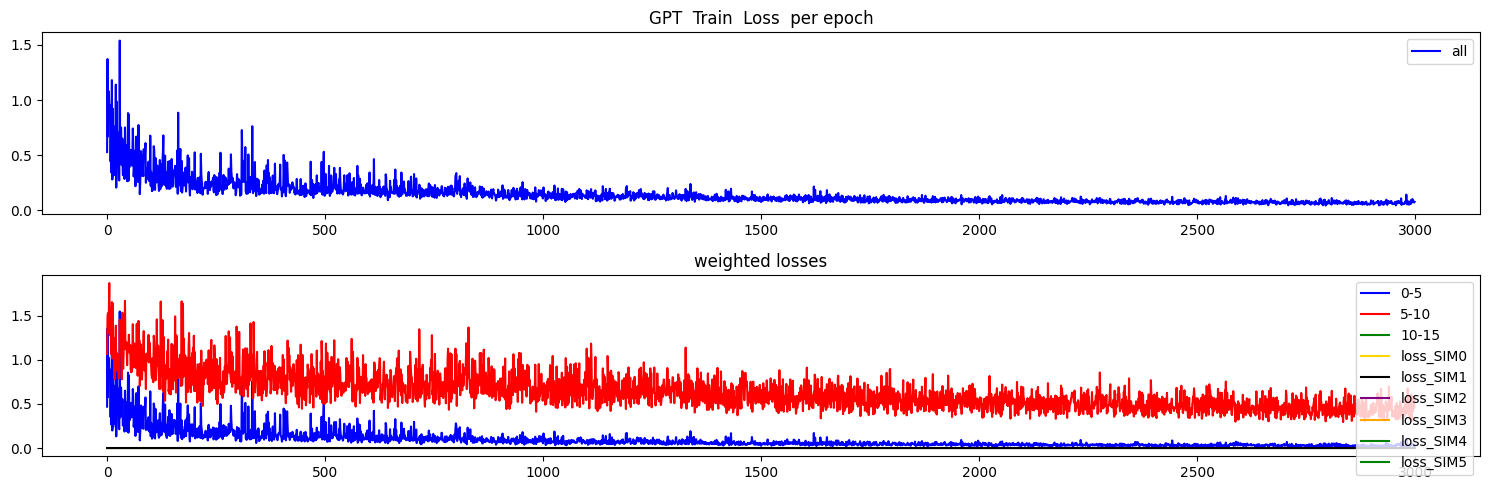

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


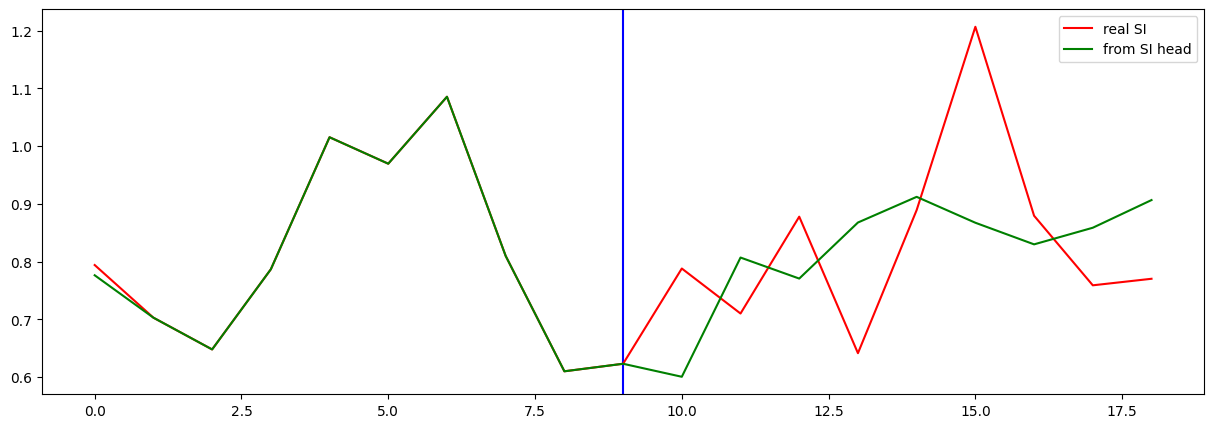

Testing R**2 - (all) - (no inputs):  0.9901268705125624
Testing R**2 - (f2) - SI full (no inputs):  -0.47133091326089094
Testing R**2 - SI head only (no inputs):  0.30078190801981153
0 ...index R**2 (no inputs):  -0.09363445608061438
1 ...index R**2 (no inputs):  -1.597268170513992
2 ...index R**2 (no inputs):  -0.47133091326089094
3 ...index R**2 (no inputs):  -1.0691350963474484
4 ...index R**2 (no inputs):  -87.04254583446429
5 ...index R**2 (no inputs):  -1.5680438028055272
6 ...index R**2 (no inputs):  -5781.032624339939
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.1598435953585431
10 ...index R**2 (no inputs):  -0.44511220200079404
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -6.87231080120757
16 ...index R**2 (no inputs):  -1.4325079962742144
17 ...index R**2 (no inputs):  -270.42905606903696
18 ...i

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.892174
Loss_SI: 0.8403924703598022 Loss_all: 1.358210802078247
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.365461
Loss_SI: 0.33825987577438354 Loss_all: 0.6102685332298279
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.130997
Loss_SI: 0.06881815195083618 Loss_all: 0.6906095743179321
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.128090
Loss_SI: 0.07395634055137634 Loss_all: 0.615293025970459
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.078994
Loss_SI: 0.03328122943639755 Loss_all: 0.4904091954231262
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.084857
Loss_SI: 0.045316047966480255 Loss_all: 0.44072994589805603
Prediction shape: torch.Size([32, 35])
===


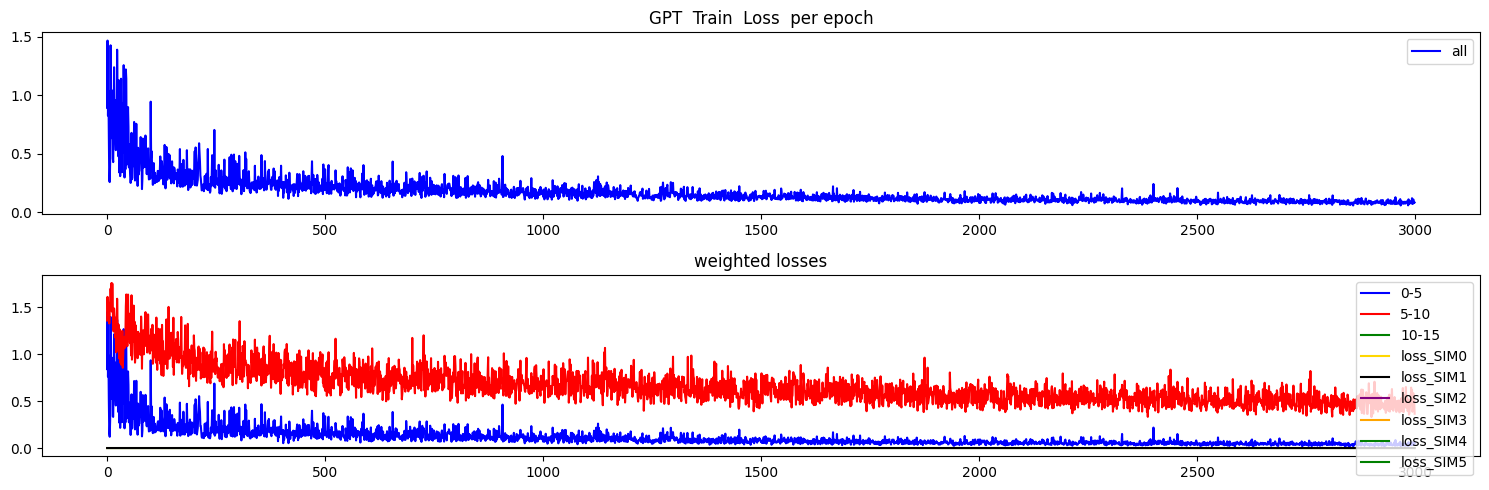

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


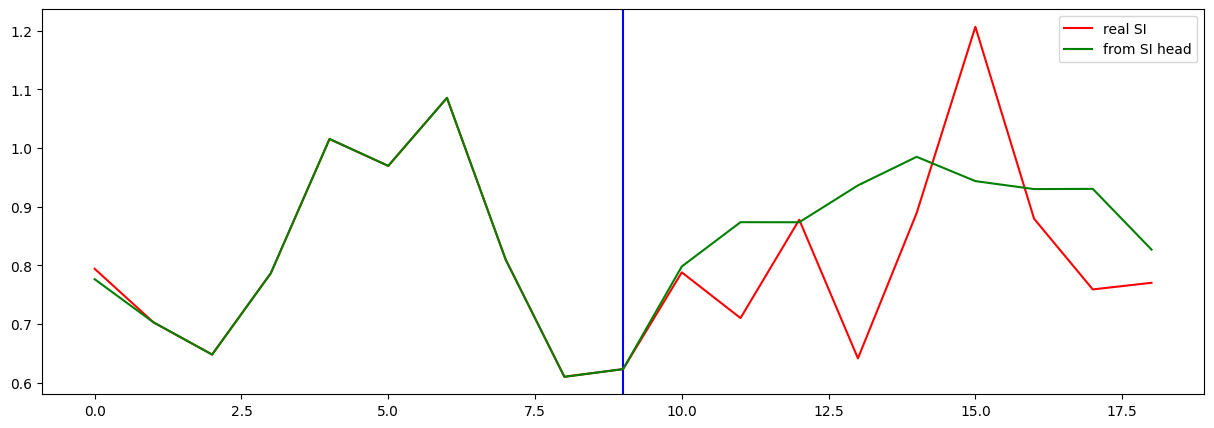

Testing R**2 - (all) - (no inputs):  0.9643783081425774
Testing R**2 - (f2) - SI full (no inputs):  -0.18619403149752523
Testing R**2 - SI head only (no inputs):  0.1744875136134052
0 ...index R**2 (no inputs):  -0.1934749573861949
1 ...index R**2 (no inputs):  -2.8795126834133016
2 ...index R**2 (no inputs):  -0.18619403149752523
3 ...index R**2 (no inputs):  -6.1852758782885475
4 ...index R**2 (no inputs):  -202.0703830307145
5 ...index R**2 (no inputs):  -8.27749638830805
6 ...index R**2 (no inputs):  -2324.9716273970657
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.0319309016785798
10 ...index R**2 (no inputs):  -0.17090148644250647
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -15.053531967017427
16 ...index R**2 (no inputs):  -1.5645144698810367
17 ...index R**2 (no inputs):  -1883.5612477389136
18 ...i

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [34]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.547099
Loss_SI: 0.4640412926673889 Loss_all: 1.2946155071258545
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.092841
Loss_SI: 0.033792681992053986 Loss_all: 0.6242721080780029
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.053687
Loss_SI: 0.008782628923654556 Loss_all: 0.45783114433288574
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.058638
Loss_SI: 0.021526191383600235 Loss_all: 0.39264264702796936
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.031227
Loss_SI: 0.006350254639983177 Loss_all: 0.2551199793815613
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.034181
Loss_SI: 0.004917794838547707 Loss_all: 0.29754695296287537
Prediction shape: torch.Size([32, 35])
===


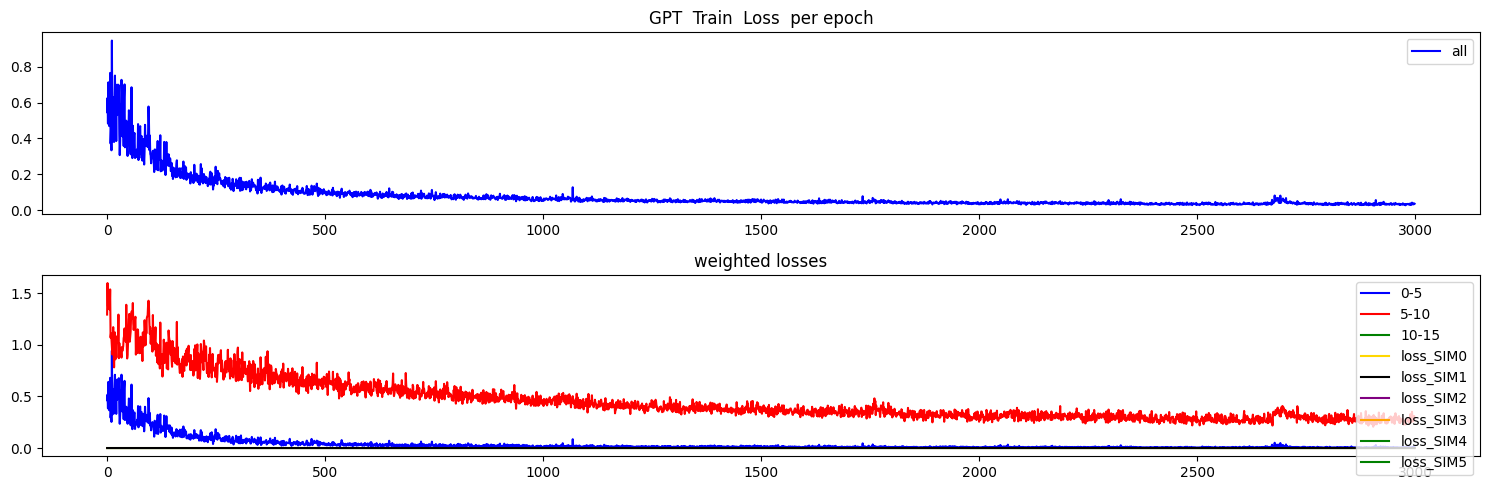

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


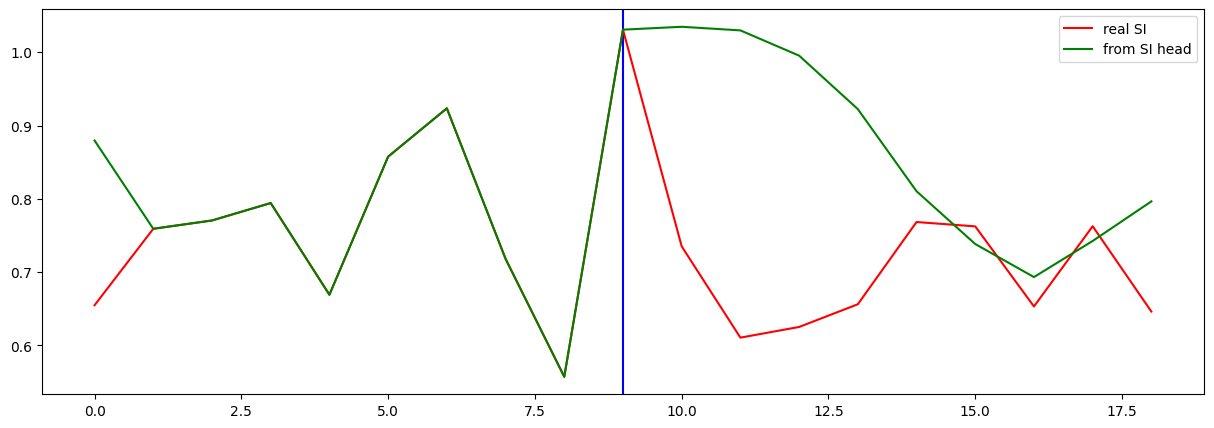

Testing R**2 - (all) - (no inputs):  0.9790514979555536
Testing R**2 - (f2) - SI full (no inputs):  -14.866048363432595
Testing R**2 - SI head only (no inputs):  -15.30578137989757
0 ...index R**2 (no inputs):  -2.1548298301461757
1 ...index R**2 (no inputs):  -1.4475687410565876
2 ...index R**2 (no inputs):  -14.866048363432595
3 ...index R**2 (no inputs):  -1087.823528362393
4 ...index R**2 (no inputs):  -593.3582180459434
5 ...index R**2 (no inputs):  -10.347756356258598
6 ...index R**2 (no inputs):  -30.72371424233227
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.3295526021791373
10 ...index R**2 (no inputs):  -1.7995994178259394
11 ...index R**2 (no inputs):  -4.696900673350702
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.5968196465455469
16 ...index R**2 (no inputs):  -2.5809121066129754
17 ...index R**2 (no inputs):  -9.364982292488

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.718190
Loss_SI: 0.6557073593139648 Loss_all: 1.2805339097976685
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.175735
Loss_SI: 0.11164188385009766 Loss_all: 0.7525689005851746
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.109987
Loss_SI: 0.04549066722393036 Loss_all: 0.690449059009552
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.077862
Loss_SI: 0.04112884774804115 Loss_all: 0.4084646999835968
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.055641
Loss_SI: 0.016671232879161835 Loss_all: 0.4063711166381836
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.045475
Loss_SI: 0.014527900144457817 Loss_all: 0.32399889826774597
Prediction shape: torch.Size([32, 35])
===


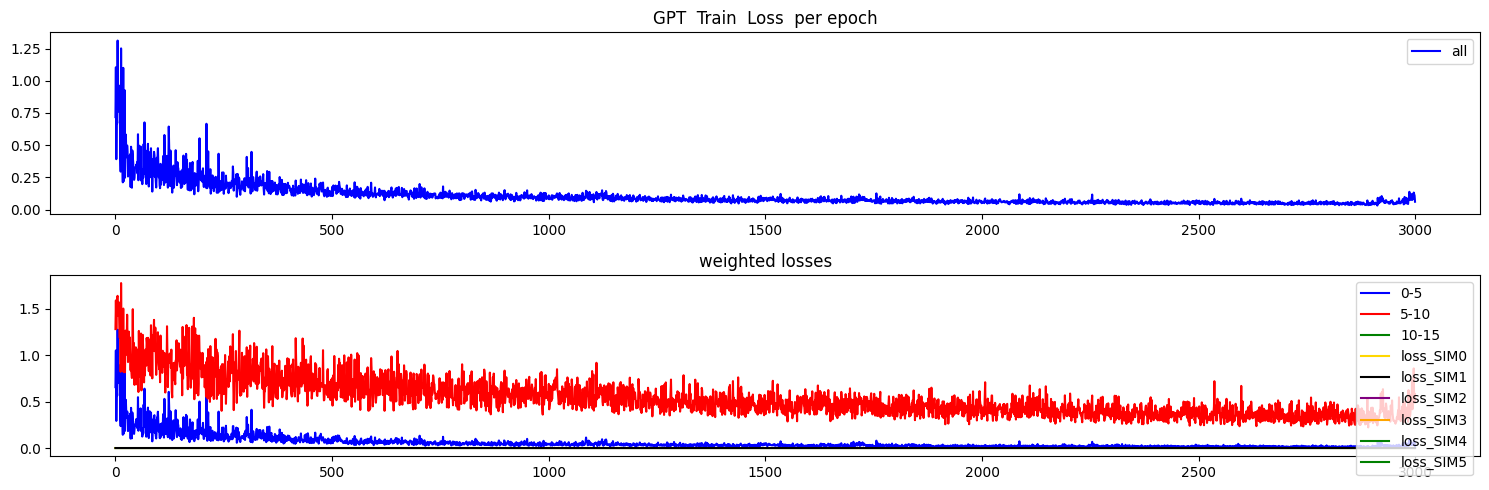

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


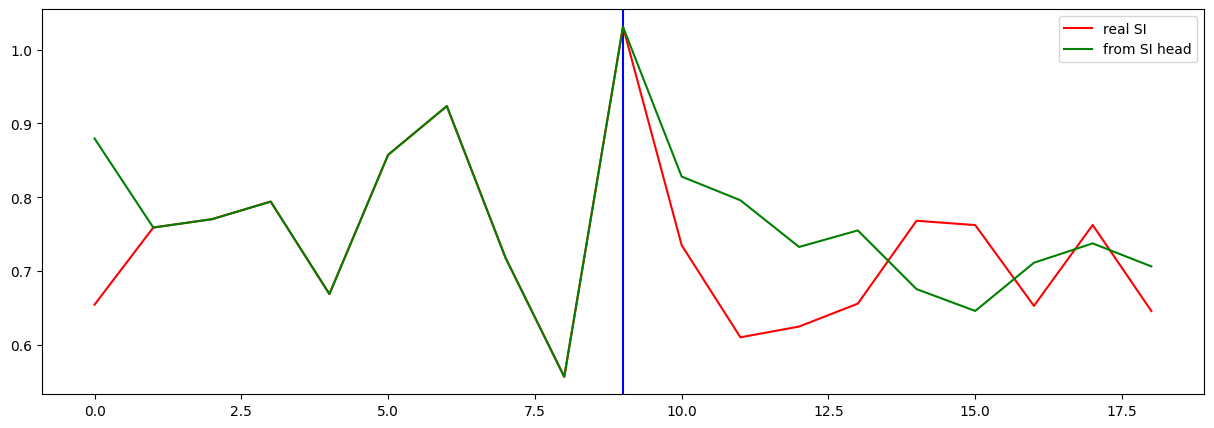

Testing R**2 - (all) - (no inputs):  0.9960540234608555
Testing R**2 - (f2) - SI full (no inputs):  -0.9031405544160613
Testing R**2 - SI head only (no inputs):  -2.215247661787209
0 ...index R**2 (no inputs):  0.0387514823119981
1 ...index R**2 (no inputs):  -3.614433785336961
2 ...index R**2 (no inputs):  -0.9031405544160613
3 ...index R**2 (no inputs):  -22.44163958386021
4 ...index R**2 (no inputs):  -0.3122313800633656
5 ...index R**2 (no inputs):  -1.1384796953943548
6 ...index R**2 (no inputs):  -0.13340013711484522
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.9048219347254614
10 ...index R**2 (no inputs):  -0.49505143253643524
11 ...index R**2 (no inputs):  -61.49920509009369
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.460406171163463
16 ...index R**2 (no inputs):  -3.521660797697228
17 ...index R**2 (no inputs):  -11.53292227474

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.517128
Loss_SI: 0.420899897813797 Loss_all: 1.3831827640533447
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.164938
Loss_SI: 0.0983809232711792 Loss_all: 0.7639522552490234
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.171796
Loss_SI: 0.09367667883634567 Loss_all: 0.8748728632926941
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.129303
Loss_SI: 0.0748751312494278 Loss_all: 0.6191564202308655
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.103938
Loss_SI: 0.04911195486783981 Loss_all: 0.5973688364028931
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.086489
Loss_SI: 0.042773451656103134 Loss_all: 0.47992855310440063
Prediction shape: torch.Size([32, 35])
===


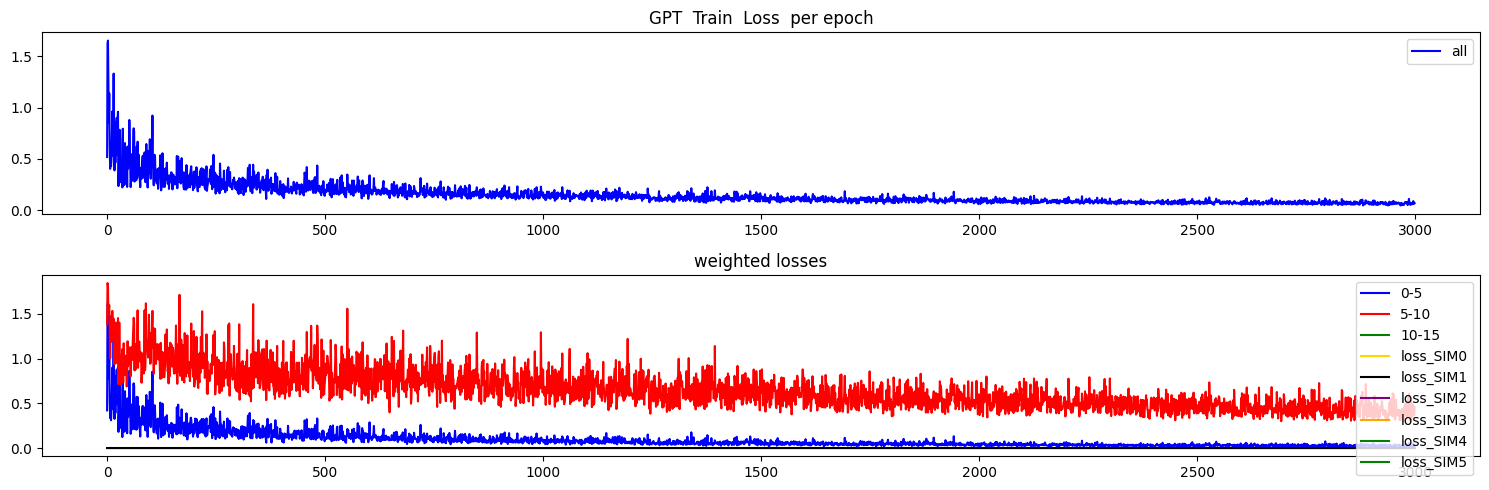

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


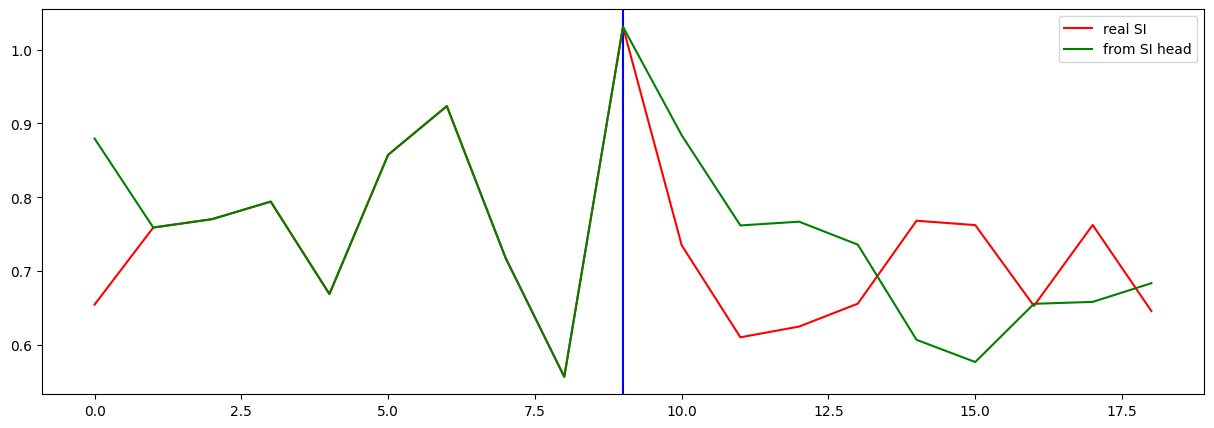

Testing R**2 - (all) - (no inputs):  0.9881713897157857
Testing R**2 - (f2) - SI full (no inputs):  -2.4766074635968804
Testing R**2 - SI head only (no inputs):  -3.619927191796436
0 ...index R**2 (no inputs):  0.07411857250852816
1 ...index R**2 (no inputs):  -1.857115358612707
2 ...index R**2 (no inputs):  -2.4766074635968804
3 ...index R**2 (no inputs):  -150.14181123201152
4 ...index R**2 (no inputs):  -35.14895922896913
5 ...index R**2 (no inputs):  -5.3892244480218015
6 ...index R**2 (no inputs):  -1.8069031206234767
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.4408824770335826
10 ...index R**2 (no inputs):  -0.7488141947787292
11 ...index R**2 (no inputs):  -10.203751689065273
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.626814090871134
16 ...index R**2 (no inputs):  -2.706401030156123
17 ...index R**2 (no inputs):  -209.4937773978

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.653729
Loss_SI: 0.5995465517044067 Loss_all: 1.1413708925247192
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.205528
Loss_SI: 0.15908005833625793 Loss_all: 0.6235569715499878
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.116122
Loss_SI: 0.04414597153663635 Loss_all: 0.7639064192771912
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.106697
Loss_SI: 0.04863089323043823 Loss_all: 0.6292940974235535
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.086449
Loss_SI: 0.041301630437374115 Loss_all: 0.49277055263519287
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.079331
Loss_SI: 0.043812911957502365 Loss_all: 0.39898887276649475
Prediction shape: torch.Size([32, 35])
===


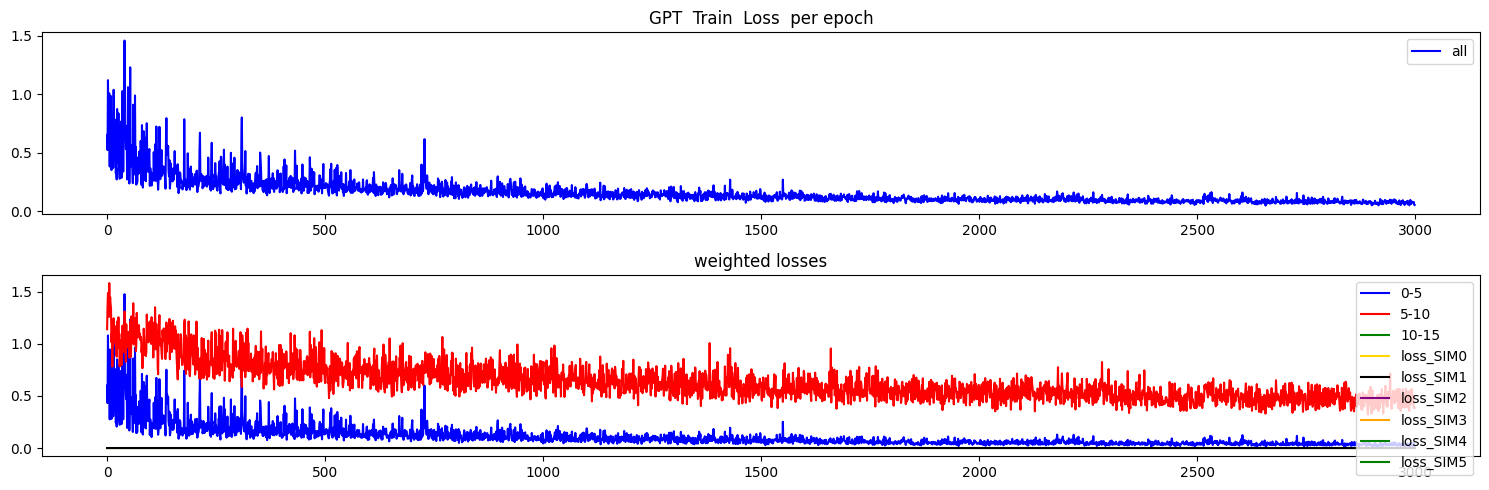

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


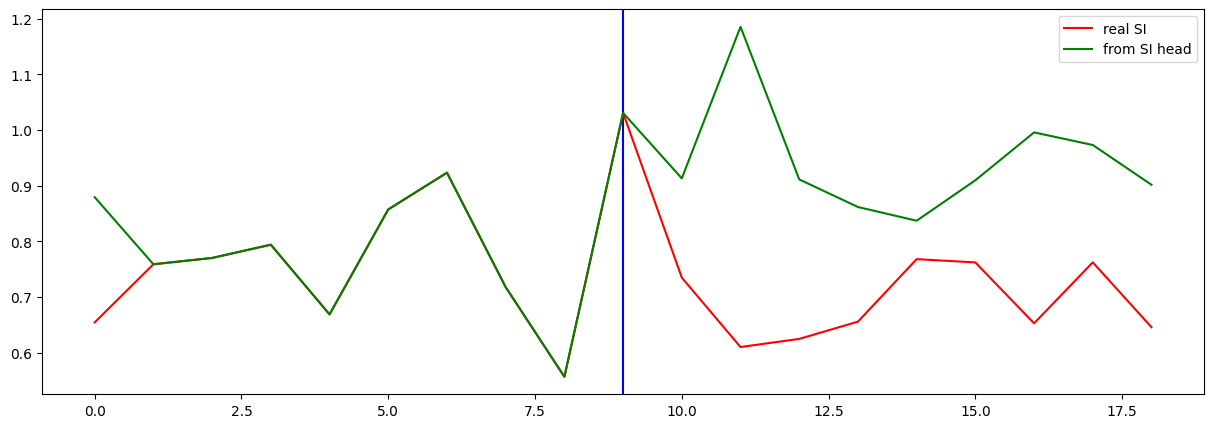

Testing R**2 - (all) - (no inputs):  0.9936264231954968
Testing R**2 - (f2) - SI full (no inputs):  -23.03525312452069
Testing R**2 - SI head only (no inputs):  -22.962761771536172
0 ...index R**2 (no inputs):  -0.9097588796634568
1 ...index R**2 (no inputs):  -2.434081855407798
2 ...index R**2 (no inputs):  -23.03525312452069
3 ...index R**2 (no inputs):  -1168.942132899169
4 ...index R**2 (no inputs):  -14.930987499487696
5 ...index R**2 (no inputs):  -2.4088873152205386
6 ...index R**2 (no inputs):  -3.840486428079692
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -3.047742700699895
10 ...index R**2 (no inputs):  -0.5998107977924145
11 ...index R**2 (no inputs):  -385.41402874013824
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.9011332915449137
16 ...index R**2 (no inputs):  -2.444711645915552
17 ...index R**2 (no inputs):  -243.326943314337

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [39]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.625646
Loss_SI: 0.569786787033081 Loss_all: 1.1283751726150513
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.112610
Loss_SI: 0.0484565868973732 Loss_all: 0.6899911761283875
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.065808
Loss_SI: 0.010611339472234249 Loss_all: 0.5625808835029602
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.054710
Loss_SI: 0.011346000246703625 Loss_all: 0.44498664140701294
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.048162
Loss_SI: 0.016704296693205833 Loss_all: 0.33128148317337036
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.039717
Loss_SI: 0.007946714758872986 Loss_all: 0.3256511688232422
Prediction shape: torch.Size([32, 35])
===


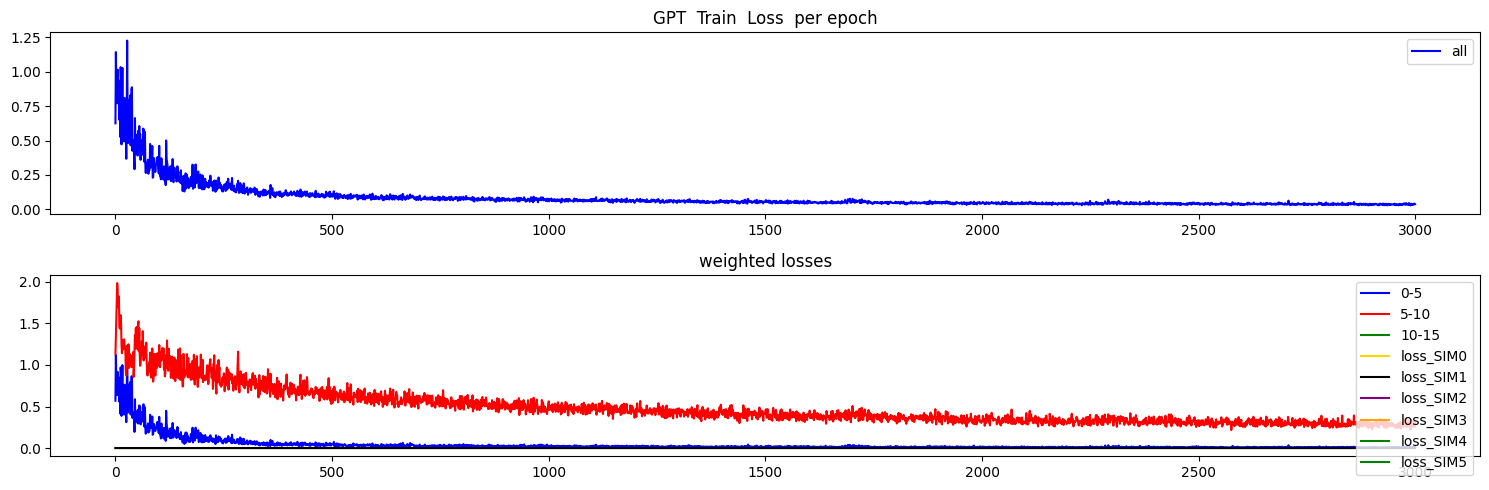

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


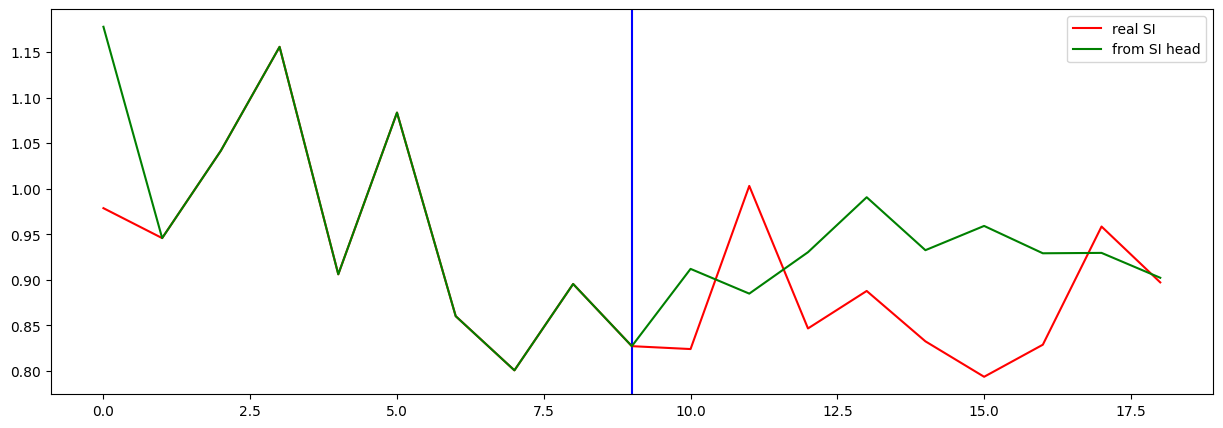

Testing R**2 - (all) - (no inputs):  0.9939213690083971
Testing R**2 - (f2) - SI full (no inputs):  -1.580392844065233
Testing R**2 - SI head only (no inputs):  -0.849624449923998
0 ...index R**2 (no inputs):  -0.21393733041841378
1 ...index R**2 (no inputs):  -0.7662884959523539
2 ...index R**2 (no inputs):  -1.580392844065233
3 ...index R**2 (no inputs):  -1.7889296055263633
4 ...index R**2 (no inputs):  -0.8363689321324281
5 ...index R**2 (no inputs):  -0.33606598246969765
6 ...index R**2 (no inputs):  -3.7219764682452716
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2716813558494835
10 ...index R**2 (no inputs):  0.05963169540357549
11 ...index R**2 (no inputs):  -35.3330087441436
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8719636001347078
16 ...index R**2 (no inputs):  -1.217438399082973
17 ...index R**2 (no inputs):  -67.3092085994

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.769953
Loss_SI: 0.7139370441436768 Loss_all: 1.2740986347198486
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.190015
Loss_SI: 0.1214064359664917 Loss_all: 0.8074933886528015
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.120098
Loss_SI: 0.05569789931178093 Loss_all: 0.6997029185295105
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.091235
Loss_SI: 0.03285909816622734 Loss_all: 0.6166173219680786
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.082076
Loss_SI: 0.0290658138692379 Loss_all: 0.5591657161712646
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.061986
Loss_SI: 0.01903720572590828 Loss_all: 0.4485240876674652
Prediction shape: torch.Size([32, 35])
===


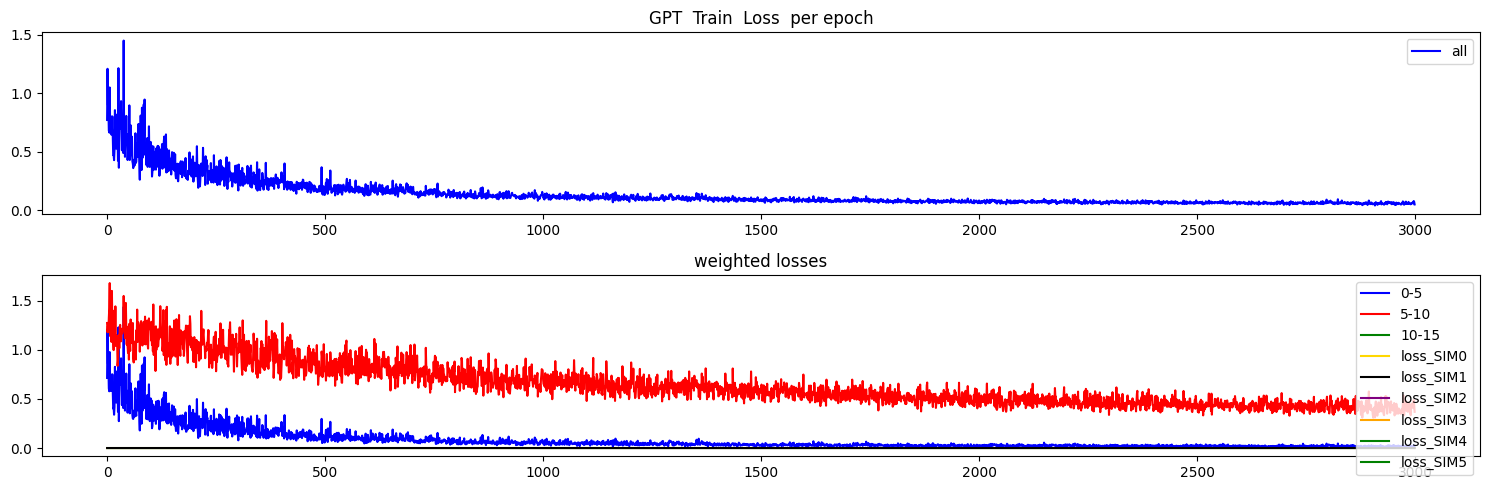

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


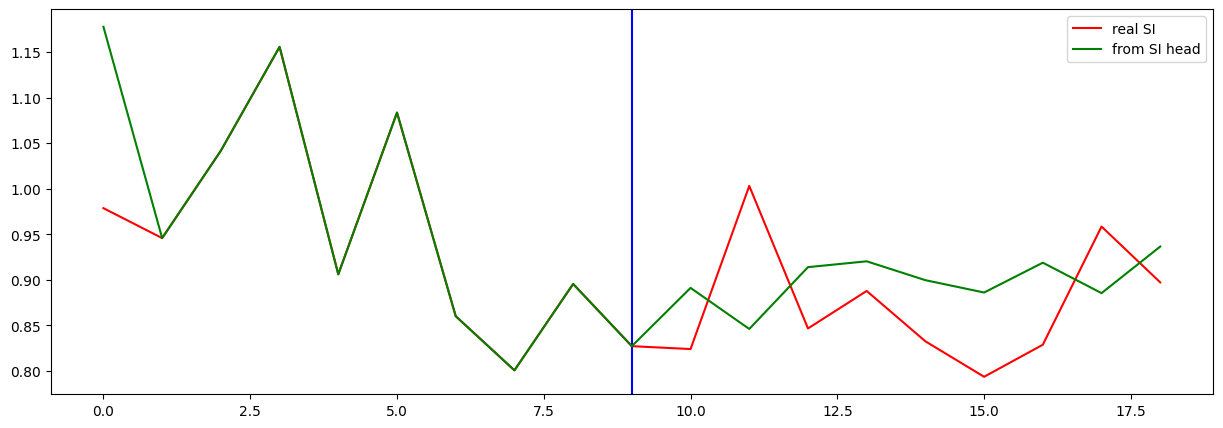

Testing R**2 - (all) - (no inputs):  0.9958353745306199
Testing R**2 - (f2) - SI full (no inputs):  -2.408900997153701
Testing R**2 - SI head only (no inputs):  0.10678588568595493
0 ...index R**2 (no inputs):  0.5302022922765042
1 ...index R**2 (no inputs):  -2.2968850167831225
2 ...index R**2 (no inputs):  -2.408900997153701
3 ...index R**2 (no inputs):  -0.49635265063536793
4 ...index R**2 (no inputs):  -3.114752118022313
5 ...index R**2 (no inputs):  0.10260683453401942
6 ...index R**2 (no inputs):  -22.926928583639167
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.46211344716007097
10 ...index R**2 (no inputs):  -0.1260482639371665
11 ...index R**2 (no inputs):  -429.6954571284903
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7137229279716493
16 ...index R**2 (no inputs):  -0.1748509540505645
17 ...index R**2 (no inputs):  -1075.9534642

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.697772
Loss_SI: 0.6129206418991089 Loss_all: 1.4614304304122925
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.165590
Loss_SI: 0.09289225935935974 Loss_all: 0.8198689222335815
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.133553
Loss_SI: 0.07030586898326874 Loss_all: 0.7027732729911804
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.112981
Loss_SI: 0.051712289452552795 Loss_all: 0.6643955707550049
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.098279
Loss_SI: 0.04312919080257416 Loss_all: 0.594628632068634
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.086271
Loss_SI: 0.03130151331424713 Loss_all: 0.5809953212738037
Prediction shape: torch.Size([32, 35])
===


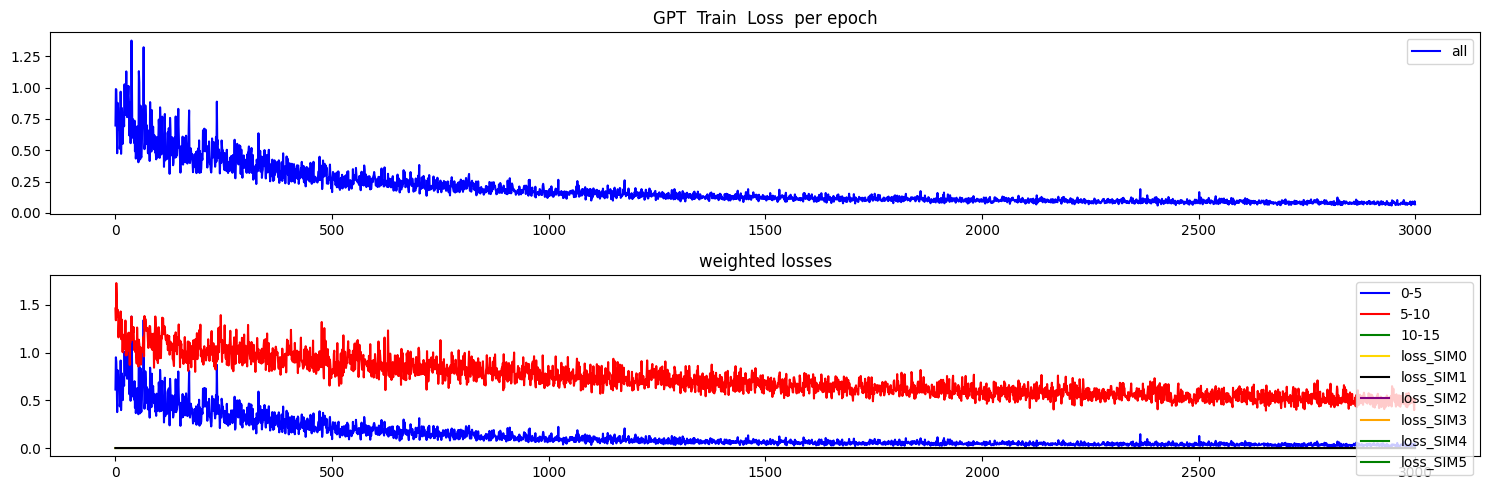

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


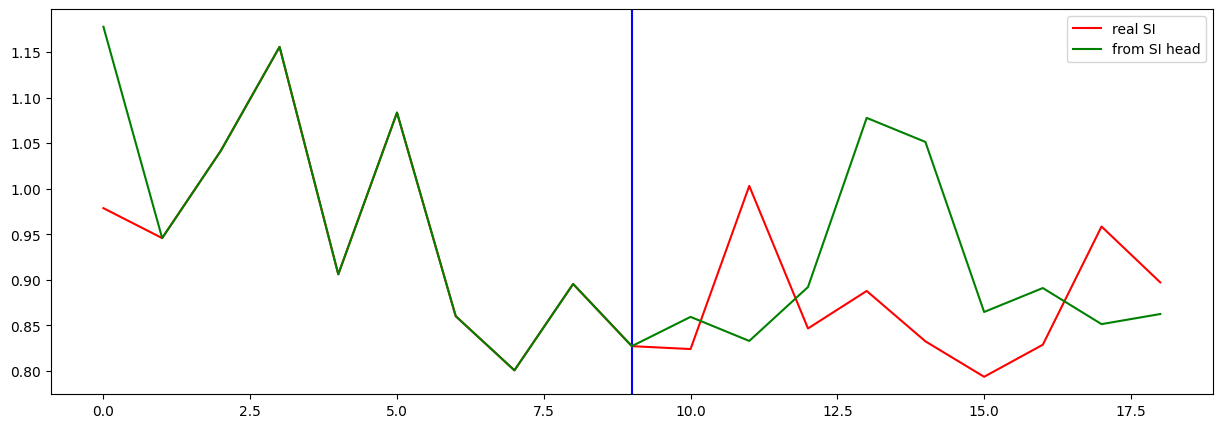

Testing R**2 - (all) - (no inputs):  0.9934681069958735
Testing R**2 - (f2) - SI full (no inputs):  -7.431088303025945
Testing R**2 - SI head only (no inputs):  -2.8748565548602474
0 ...index R**2 (no inputs):  -1.0986714907980089
1 ...index R**2 (no inputs):  -1.6928608831578709
2 ...index R**2 (no inputs):  -7.431088303025945
3 ...index R**2 (no inputs):  -0.6609264520224647
4 ...index R**2 (no inputs):  -0.6621093613115296
5 ...index R**2 (no inputs):  -0.39878746569136414
6 ...index R**2 (no inputs):  -258.2649286846693
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3246013958215417
10 ...index R**2 (no inputs):  -0.41207491946367636
11 ...index R**2 (no inputs):  -619.1941476363734
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.361282320505731
16 ...index R**2 (no inputs):  -0.6844716074646711
17 ...index R**2 (no inputs):  -1916.2771823

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.547236
Loss_SI: 0.47067761421203613 Loss_all: 1.2362604141235352
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.318514
Loss_SI: 0.2416124939918518 Loss_all: 1.010622501373291
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.155604
Loss_SI: 0.09524226188659668 Loss_all: 0.6988574266433716
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.176980
Loss_SI: 0.10995952785015106 Loss_all: 0.7801660895347595
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.097285
Loss_SI: 0.05491582304239273 Loss_all: 0.47860899567604065
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.120618
Loss_SI: 0.0728430449962616 Loss_all: 0.5505898594856262
Prediction shape: torch.Size([32, 35])
===


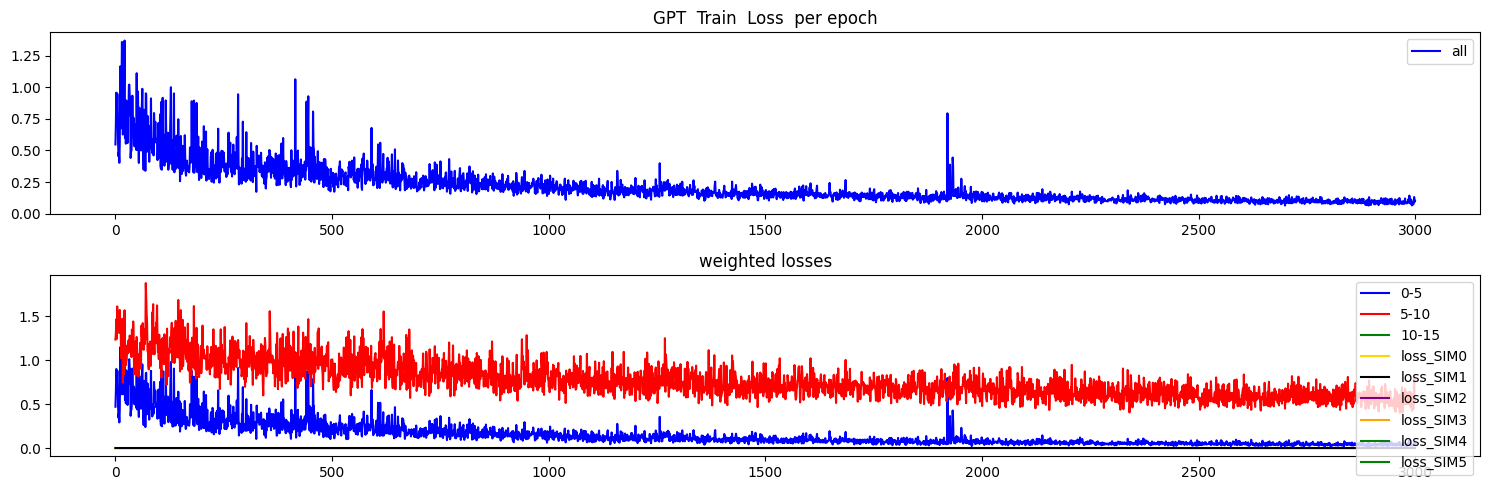

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


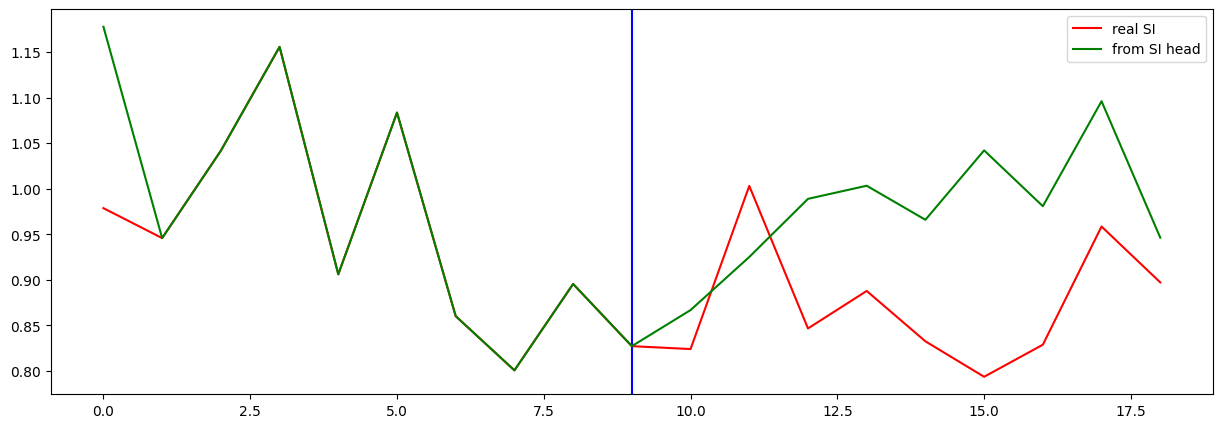

Testing R**2 - (all) - (no inputs):  0.9917424314375433
Testing R**2 - (f2) - SI full (no inputs):  -0.5826817019513297
Testing R**2 - SI head only (no inputs):  -3.138271638824362
0 ...index R**2 (no inputs):  -0.23236148197317097
1 ...index R**2 (no inputs):  -0.4298752471684355
2 ...index R**2 (no inputs):  -0.5826817019513297
3 ...index R**2 (no inputs):  -1.2968364890401385
4 ...index R**2 (no inputs):  -7.7675016455051775
5 ...index R**2 (no inputs):  -0.8135764749020922
6 ...index R**2 (no inputs):  -82.55752719283112
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.14914159662137516
10 ...index R**2 (no inputs):  -0.6872501715730426
11 ...index R**2 (no inputs):  -402.0555076348197
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8380425585916804
16 ...index R**2 (no inputs):  -1.750713904208009
17 ...index R**2 (no inputs):  -338.1875587

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [44]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.802357
Loss_SI: 0.7218644618988037 Loss_all: 1.5267870426177979
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.129311
Loss_SI: 0.06858769804239273 Loss_all: 0.675820529460907
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.061536
Loss_SI: 0.020463865250349045 Loss_all: 0.4311833679676056
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.057243
Loss_SI: 0.015430161729454994 Loss_all: 0.4335632622241974
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.040949
Loss_SI: 0.008419863879680634 Loss_all: 0.333708792924881
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.032388
Loss_SI: 0.008586460724473 Loss_all: 0.24659937620162964
Prediction shape: torch.Size([32, 35])
===


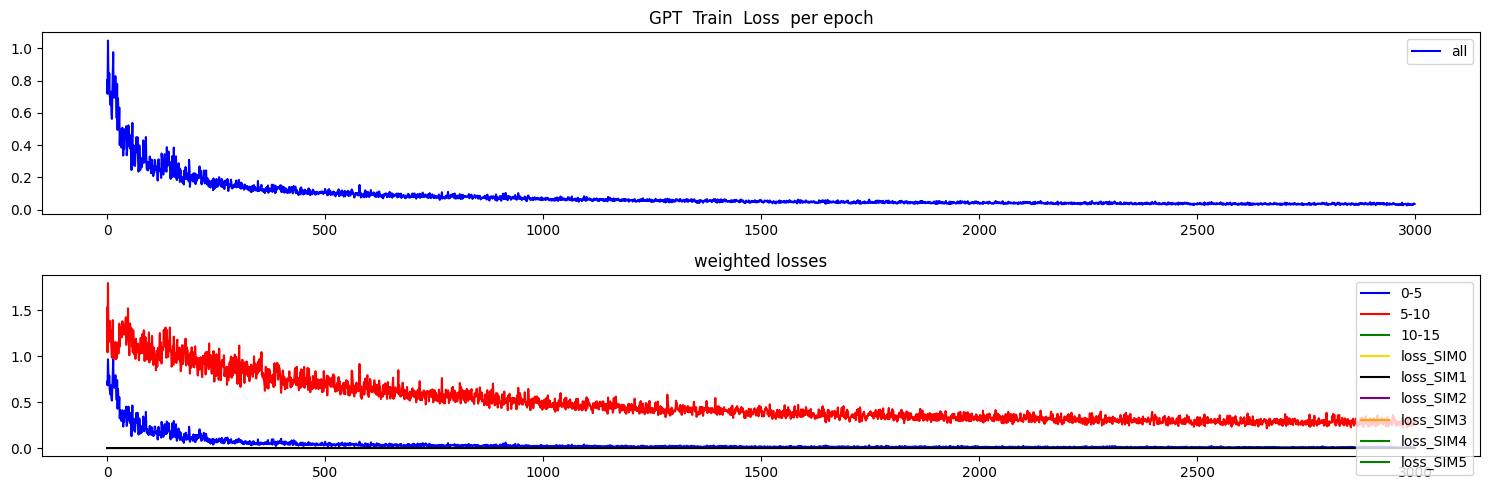

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


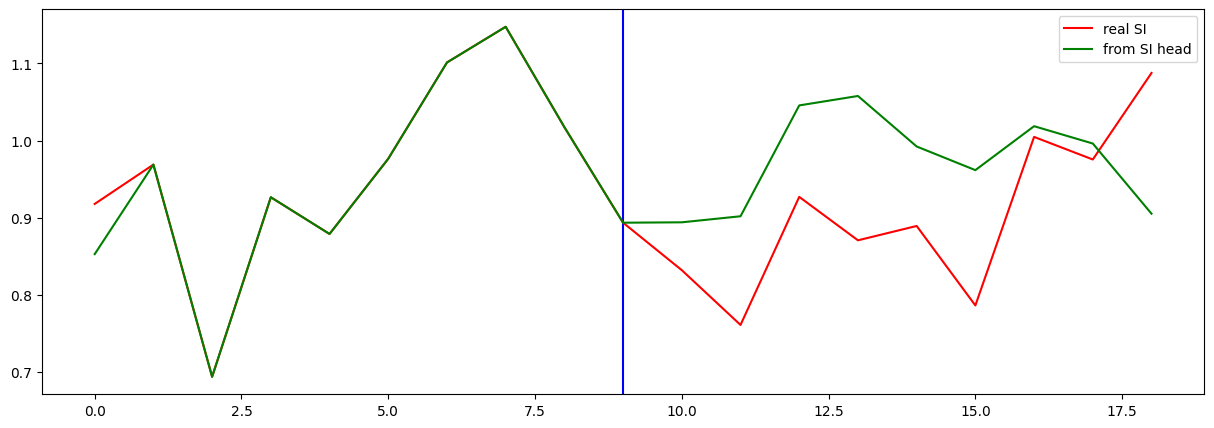

Testing R**2 - (all) - (no inputs):  0.9875622587675341
Testing R**2 - (f2) - SI full (no inputs):  -1.7320909504705089
Testing R**2 - SI head only (no inputs):  -0.5613188578449386
0 ...index R**2 (no inputs):  -0.27984559965888334
1 ...index R**2 (no inputs):  -3.6012259301322613
2 ...index R**2 (no inputs):  -1.7320909504705089
3 ...index R**2 (no inputs):  -1.327704289817603
4 ...index R**2 (no inputs):  -33.95882685359061
5 ...index R**2 (no inputs):  -26.706809832378365
6 ...index R**2 (no inputs):  -49.94328814297045
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.22391893372650307
10 ...index R**2 (no inputs):  -0.03559596072838822
11 ...index R**2 (no inputs):  0.21774347145174855
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -13.045621942707706
16 ...index R**2 (no inputs):  -4.83189493454237
17 ...index R**2 (no inputs):  -7.503529985

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.167661
Loss_SI: 1.1577421426773071 Loss_all: 1.256935715675354
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.220737
Loss_SI: 0.1293102204799652 Loss_all: 1.043574571609497
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.102785
Loss_SI: 0.031529102474451065 Loss_all: 0.7440860271453857
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.088717
Loss_SI: 0.025090329349040985 Loss_all: 0.6613558530807495
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.082508
Loss_SI: 0.035424306988716125 Loss_all: 0.5062569975852966
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.077326
Loss_SI: 0.02286492846906185 Loss_all: 0.5674709677696228
Prediction shape: torch.Size([32, 35])
===


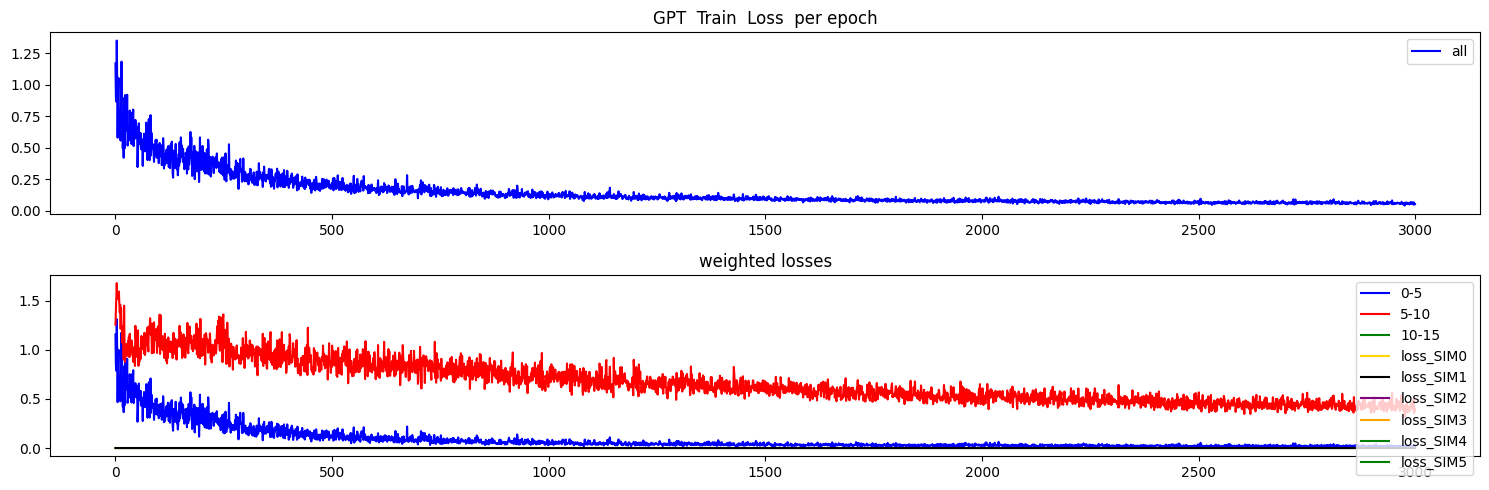

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


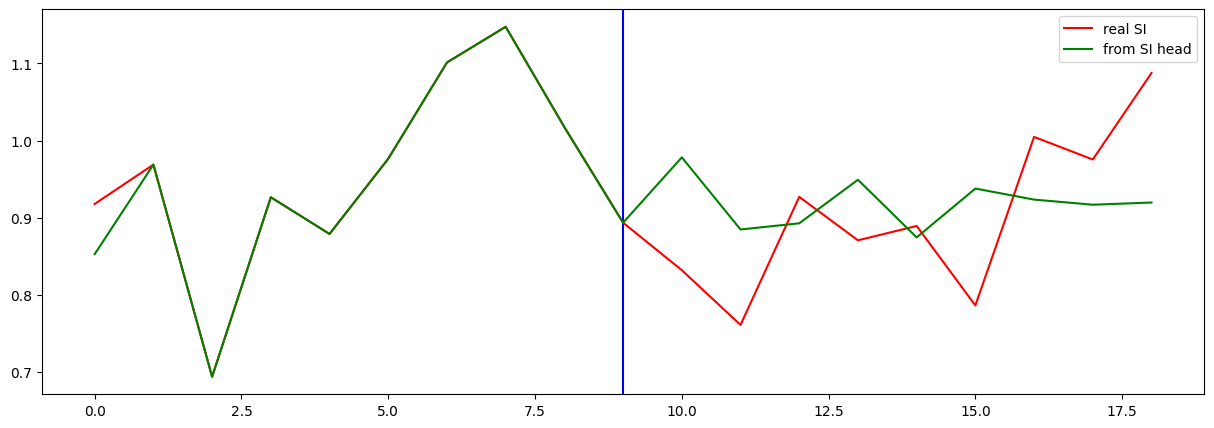

Testing R**2 - (all) - (no inputs):  0.9988723270354278
Testing R**2 - (f2) - SI full (no inputs):  -0.2877956379748108
Testing R**2 - SI head only (no inputs):  -0.1494694017674565
0 ...index R**2 (no inputs):  0.20716708708868548
1 ...index R**2 (no inputs):  -0.7729919844978863
2 ...index R**2 (no inputs):  -0.2877956379748108
3 ...index R**2 (no inputs):  -1.5118312615170746
4 ...index R**2 (no inputs):  -11.371605808211662
5 ...index R**2 (no inputs):  -1.34743247292243
6 ...index R**2 (no inputs):  -29.718660744361692
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2873719387015008
10 ...index R**2 (no inputs):  0.4845919049942049
11 ...index R**2 (no inputs):  -604.0390600716928
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.706690994008907
16 ...index R**2 (no inputs):  -3.629134914237226
17 ...index R**2 (no inputs):  -699.02105509440

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.702033
Loss_SI: 0.6672844886779785 Loss_all: 1.014771580696106
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.276459
Loss_SI: 0.20964457094669342 Loss_all: 0.8777914047241211
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.118684
Loss_SI: 0.04958658665418625 Loss_all: 0.740557074546814
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.100803
Loss_SI: 0.04031091183423996 Loss_all: 0.6452336311340332
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.089219
Loss_SI: 0.028686802834272385 Loss_all: 0.6340095400810242
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.087238
Loss_SI: 0.04024875536561012 Loss_all: 0.510138988494873
Prediction shape: torch.Size([32, 35])
===


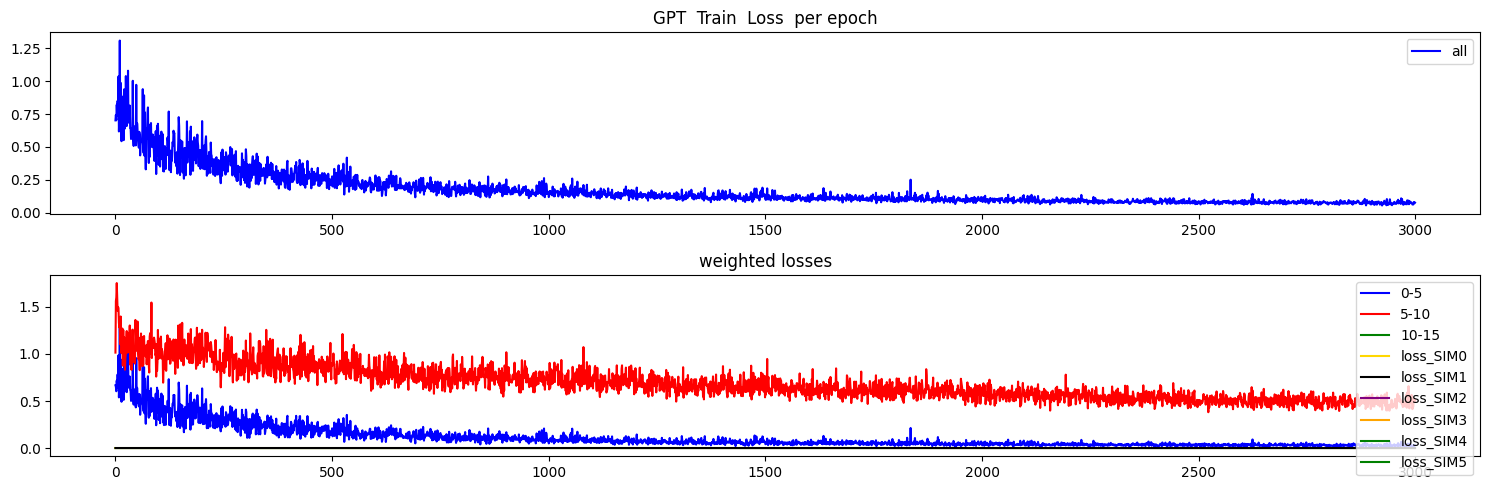

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


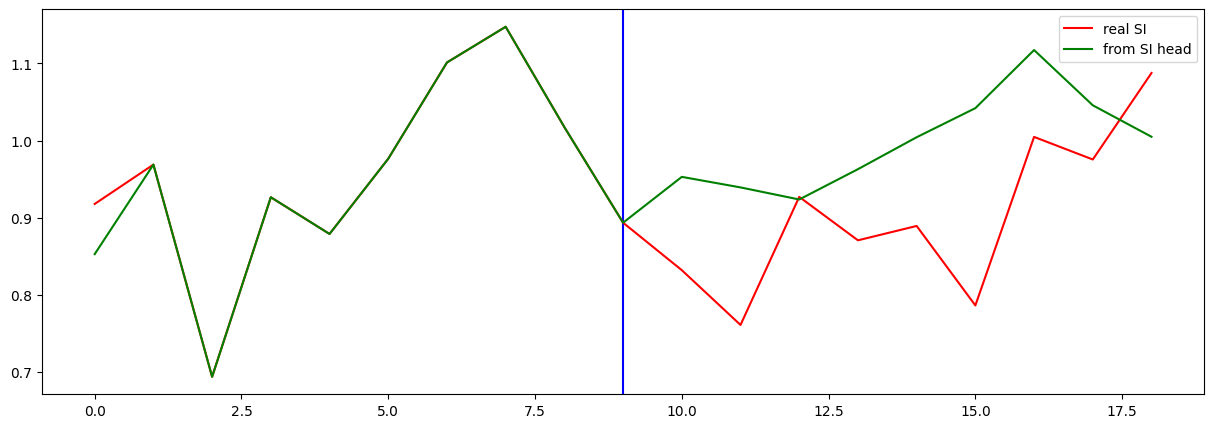

Testing R**2 - (all) - (no inputs):  0.9948723182191893
Testing R**2 - (f2) - SI full (no inputs):  0.041145161154359844
Testing R**2 - SI head only (no inputs):  -0.46221483617822656
0 ...index R**2 (no inputs):  -0.30348404484503644
1 ...index R**2 (no inputs):  -2.337698365840864
2 ...index R**2 (no inputs):  0.041145161154359844
3 ...index R**2 (no inputs):  -2.0191465741536465
4 ...index R**2 (no inputs):  -5.8117699473784965
5 ...index R**2 (no inputs):  -10.375370842340713
6 ...index R**2 (no inputs):  -82.26559919392007
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.20467361892402036
10 ...index R**2 (no inputs):  0.1359330062748242
11 ...index R**2 (no inputs):  -88.69321767528679
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.215309707368737
16 ...index R**2 (no inputs):  -0.7176230293428394
17 ...index R**2 (no inputs):  -30.157191

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.661692
Loss_SI: 0.597412109375 Loss_all: 1.2402061223983765
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.369616
Loss_SI: 0.2957474887371063 Loss_all: 1.0344314575195312
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.269986
Loss_SI: 0.20309974253177643 Loss_all: 0.8719586730003357
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.139648
Loss_SI: 0.0638129785656929 Loss_all: 0.8221672773361206
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.200124
Loss_SI: 0.1460963785648346 Loss_all: 0.6863738894462585
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.118175
Loss_SI: 0.05207188054919243 Loss_all: 0.7131004333496094
Prediction shape: torch.Size([32, 35])
===


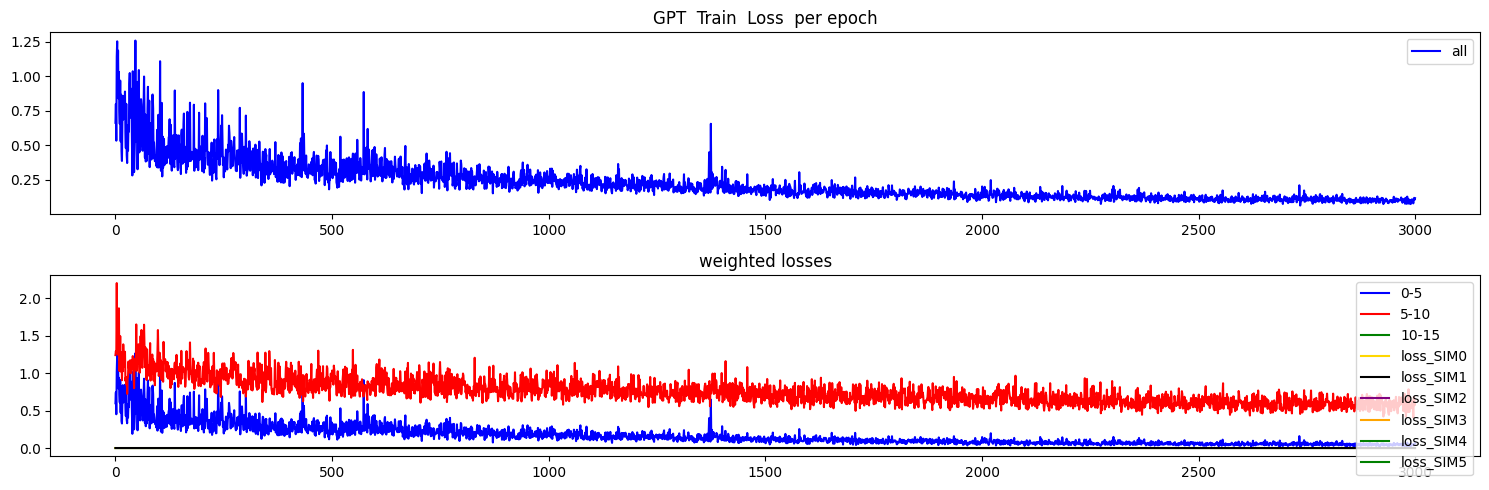

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


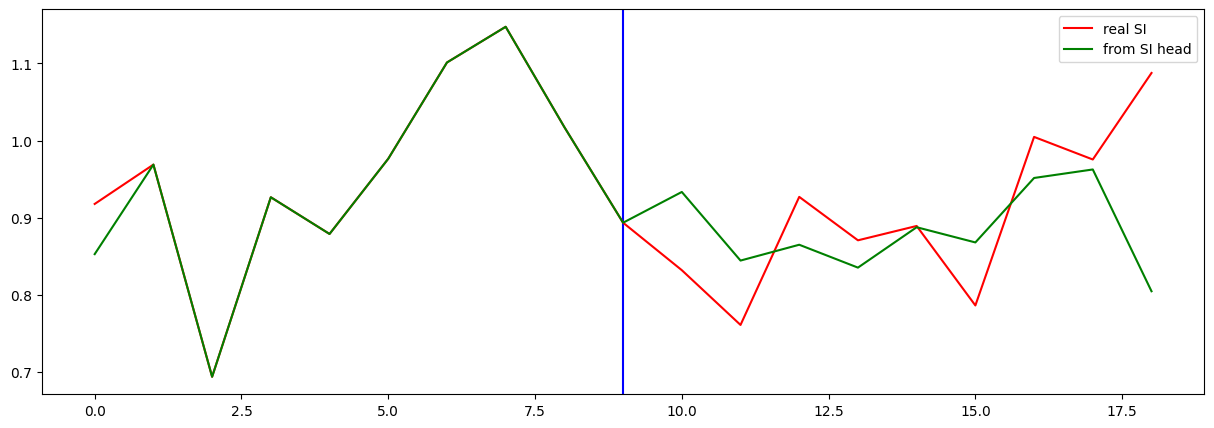

Testing R**2 - (all) - (no inputs):  0.9970384186586815
Testing R**2 - (f2) - SI full (no inputs):  -0.06809124278572232
Testing R**2 - SI head only (no inputs):  -0.15321472540322678
0 ...index R**2 (no inputs):  -0.03904517036316246
1 ...index R**2 (no inputs):  -1.7155801875282375
2 ...index R**2 (no inputs):  -0.06809124278572232
3 ...index R**2 (no inputs):  -8.857437711844534
4 ...index R**2 (no inputs):  -4.103180706416122
5 ...index R**2 (no inputs):  -5.220838672581052
6 ...index R**2 (no inputs):  -85.41424286704168
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.30782814334510755
10 ...index R**2 (no inputs):  0.03228744923455418
11 ...index R**2 (no inputs):  -503.85009468868515
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.2076048617904567
16 ...index R**2 (no inputs):  -0.7665906142050609
17 ...index R**2 (no inputs):  -1835.809

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [49]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [50]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -0.40753827413252597


In [51]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: 0.0228373753812523


In [52]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -0.01917594400037914


In [53]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -0.6847084123840079



## First Few R2


In [54]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....R² on first n steps:", r2_first4)


In [55]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....R² on first n steps: -1.929279254103665
2 .....R² on first n steps: -1.6130127505525924
3 .....R² on first n steps: -1.20948440577307
4 .....R² on first n steps: -1.1885952437935572
5 .....R² on first n steps: -1.0842122004704184
6 .....R² on first n steps: -0.9374368069484347
7 .....R² on first n steps: -0.7418563074091242
8 .....R² on first n steps: -0.4778604061188103
9 .....R² on first n steps: -0.40753827413252597


In [56]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....R² on first n steps: -2.8939905397360746
2 .....R² on first n steps: -1.649538747042525
3 .....R² on first n steps: -0.8062241780876982
4 .....R² on first n steps: -0.492681268701892
5 .....R² on first n steps: -0.3850691023668147
6 .....R² on first n steps: -0.2916240707486697
7 .....R² on first n steps: -0.1865691053317513
8 .....R² on first n steps: -0.04651031557150076
9 .....R² on first n steps: 0.0228373753812523


In [57]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....R² on first n steps: -0.6627394685415993
2 .....R² on first n steps: -0.2348592401285161
3 .....R² on first n steps: 0.10981250244109209
4 .....R² on first n steps: -0.2497143665617052
5 .....R² on first n steps: -0.4091149419282325
6 .....R² on first n steps: -0.313288661564322
7 .....R² on first n steps: -0.2312343591665187
8 .....R² on first n steps: -0.029389461376308823
9 .....R² on first n steps: -0.01917594400037914


In [58]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....R² on first n steps: -0.5710310736412816
2 .....R² on first n steps: -1.8858814444408694
3 .....R² on first n steps: -1.4130653283202417
4 .....R² on first n steps: -1.245665608452235
5 .....R² on first n steps: -0.7886416808892307
6 .....R² on first n steps: -0.8986051353277604
7 .....R² on first n steps: -0.8168287377038146
8 .....R² on first n steps: -0.7152394584906892
9 .....R² on first n steps: -0.6847084123840079



## Plot


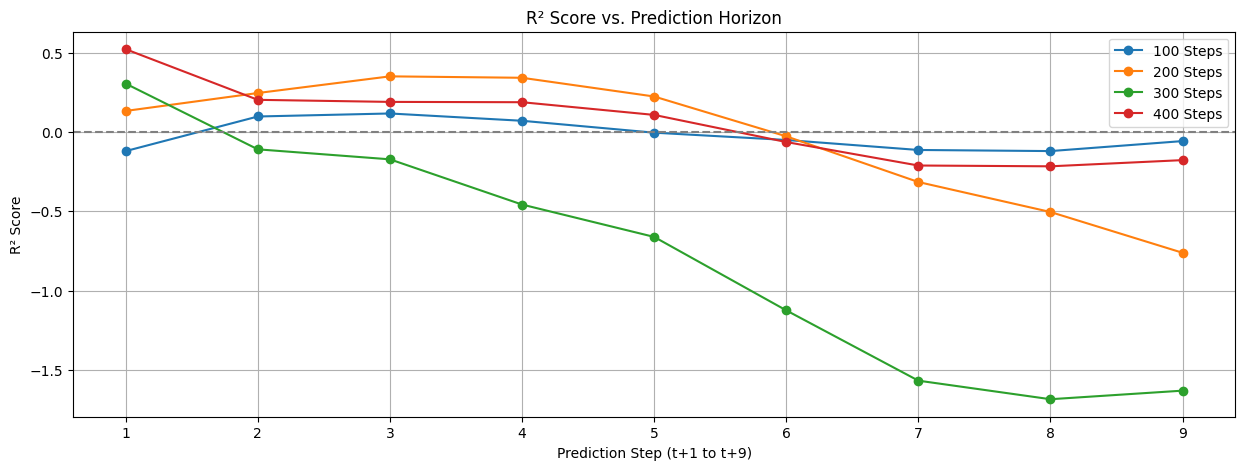

In [59]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
